<a href="https://colab.research.google.com/github/Olena299/E-commerce-Data-Exploration/blob/main/E_commerce_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Mate_homework


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Mate_homework


###1. Data overview. Розуміння даних та їх змісту.
Завантаж датасет, розберись зі змістом колонок, зроби їх опис.
Вияви ключові поля, що поєднують три таблиці.

In [ ]:
events = pd.read_csv("events.csv")
events.head()

Order ID Order Date   Ship Date Order Priority Country Code  Product ID  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  101025998  7/18/2014   8/11/2014              M          NaN        7940   
3  102230632  5/13/2017   6/13/2017              L          MNE        2455   
4  103435266  8/11/2012   9/18/2012              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost  
0        Online       650.0      205.70     117.11  
1       Offline      1993.0      205.70     117.11  
2        Online      4693.0      668.27     502.54  
3        Online      1171.0      109.28      35.84  
4       Offline      7648.0       47.45      31.79

In [ ]:
events.columns = events.columns.str.lower().str.replace(" ", "_")

In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        1330 non-null   int64  
 1   order_date      1330 non-null   object 
 2   ship_date       1330 non-null   object 
 3   order_priority  1330 non-null   object 
 4   country_code    1248 non-null   object 
 5   product_id      1330 non-null   int64  
 6   sales_channel   1330 non-null   object 
 7   units_sold      1328 non-null   float64
 8   unit_price      1330 non-null   float64
 9   unit_cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


Набір даних **"events"** містить інформацію про продажі в період з 2010 по 2017 роки.
* order_id - ідентифікатор замовлення;    
* order_date -  дата замовлення;
* ship_date — дата відвантаження замовлення;
* order_priority — пріоритет замовлення;
* country_code — ідентифікатор (код) країни;
* product_id — ідентифікатор товару;
* sales_channel — канал, через який зроблене замовлення;
* units_sold — кількість проданих одиниць товару;
* unit_price — ціна за одиницю товару;
* unit_cost — витрати на одиницю товару;

events поєднується з таблицею countries по
* countries.alpha_3 = events.country_code

events поєднується з таблицею products по
* events.product_id = products.id

In [ ]:
products = pd.read_csv("products.csv")
products.head()

id        item_type
0  2103           Cereal
1  7940        Household
2  2455          Clothes
3  1270        Beverages
4  8681  Office Supplies

In [ ]:
print(products)

      id        item_type
0   2103           Cereal
1   7940        Household
2   2455          Clothes
3   1270        Beverages
4   8681  Office Supplies
5   4594           Fruits
6   5988       Vegetables
7   7331        Baby Food
8   8875             Meat
9   8293        Cosmetics
10  8969           Snacks
11  3127    Personal Care


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


Набір даних **"products"** містить інформацію товари.
* id - ідентифікатор товару;
* item_type - назва категорії товару, його тип;

events поєднується з таблицею products по
* events.product_id = products.id

In [ ]:
countries = pd.read_csv("countries.csv")
countries.head()

name alpha-2 alpha-3   region       sub-region
0     Afghanistan      AF     AFG     Asia    Southern Asia
1   Åland Islands      AX     ALA   Europe  Northern Europe
2         Albania      AL     ALB   Europe  Southern Europe
3         Algeria      DZ     DZA   Africa  Northern Africa
4  American Samoa      AS     ASM  Oceania        Polynesia

In [ ]:
print(countries)

                  name alpha-2 alpha-3   region          sub-region
0          Afghanistan      AF     AFG     Asia       Southern Asia
1        Åland Islands      AX     ALA   Europe     Northern Europe
2              Albania      AL     ALB   Europe     Southern Europe
3              Algeria      DZ     DZA   Africa     Northern Africa
4       American Samoa      AS     ASM  Oceania           Polynesia
..                 ...     ...     ...      ...                 ...
244  Wallis and Futuna      WF     WLF  Oceania           Polynesia
245     Western Sahara      EH     ESH   Africa     Northern Africa
246              Yemen      YE     YEM     Asia        Western Asia
247             Zambia      ZM     ZMB   Africa  Sub-Saharan Africa
248           Zimbabwe      ZW     ZWE   Africa  Sub-Saharan Africa

[249 rows x 5 columns]


In [ ]:
countries.columns = countries.columns.str.lower().str.replace("-", "_")
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha_2     248 non-null    object
 2   alpha_3     249 non-null    object
 3   region      248 non-null    object
 4   sub_region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [ ]:
print(countries.isna().sum() / countries.shape[0] * 100)

name          0.000000
alpha_2       0.401606
alpha_3       0.000000
region        0.401606
sub_region    0.401606
dtype: float64


Набір даних **"countries"** містить інформацію про країни, у які компанія продає продукцію.
* name - назва країни;    
* alpha_2 -  скорочений код країни з 2-х літер;
* alpha_3 — скорочений код країни з 3-х літер;
* region — регіон глобально;
* sub_region — конкретна частина глобального регіона;

countries поєднується з таблицею events по
* countries.alpha_3 = events.country_code

###2. Data cleaning. Робота із пропущеними даними, некоректними даними, аномаліями.

####Проведемо дослідження по кожному датасету окремо

######events

Подивимось, скільки рядків та колонок є у нашому датасеті та виведемо загальну інформацію про датасет

In [ ]:
print(events.shape)

(1330, 10)


In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        1330 non-null   int64  
 1   order_date      1330 non-null   object 
 2   ship_date       1330 non-null   object 
 3   order_priority  1330 non-null   object 
 4   country_code    1248 non-null   object 
 5   product_id      1330 non-null   int64  
 6   sales_channel   1330 non-null   object 
 7   units_sold      1328 non-null   float64
 8   unit_price      1330 non-null   float64
 9   unit_cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


Отже, маємо 1330 записів у наборі даних, причому деякі стовпчики містять пропущені значення.
З'ясуємо типи даних у кожному стовпчику:

In [ ]:
print(events.dtypes)

order_id            int64
order_date         object
ship_date          object
order_priority     object
country_code       object
product_id          int64
sales_channel      object
units_sold        float64
unit_price        float64
unit_cost         float64
dtype: object


Перевіряємо чи є пропущені значення, працюємо з ними:

In [ ]:
print(events.isna().sum())

order_id           0
order_date         0
ship_date          0
order_priority     0
country_code      82
product_id         0
sales_channel      0
units_sold         2
unit_price         0
unit_cost          0
dtype: int64


Є пропущені значення в 2-х стовпчиках: country_code - 82 та units_sold - 2

Обчислимо долю відсутніх значень у загальній кількості:

In [ ]:
print(events.isna().sum() / events.shape[0] * 100)

order_id          0.000000
order_date        0.000000
ship_date         0.000000
order_priority    0.000000
country_code      6.165414
product_id        0.000000
sales_channel     0.000000
units_sold        0.150376
unit_price        0.000000
unit_cost         0.000000
dtype: float64


Оскільки доля пропусків country_code більше 6 відсотків, не можна просто видалити ці дані. Заповнюємо пропущенні значення у стовпчику country_code значенням "Unknown". Оскільки доля пропусків units_sold 0.150376, тобто, достатньо велика, не можна просто видалити ці дані. Заповнюємо пропущенні значення у стовпчику units_sold значенням моди. Створюємо копію з заповненними значеннями, щоб можна було повернутися до початку аналіза, якщо щось піде не так. Дивимися, чи лишились пропущені дані. Їх немає. Тепер будем працювати з events_filled.

In [ ]:
events_filled = events.copy()
events_filled["country_code"] = events_filled["country_code"].fillna("Unknown")
events_filled["units_sold"] = events_filled["units_sold"].fillna(events_filled["units_sold"].mode()[0])
print(events_filled.isna().sum())
print(events_filled.head())

order_id          0
order_date        0
ship_date         0
order_priority    0
country_code      0
product_id        0
sales_channel     0
units_sold        0
unit_price        0
unit_cost         0
dtype: int64
    order_id order_date   ship_date order_priority country_code  product_id  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  101025998  7/18/2014   8/11/2014              M      Unknown        7940   
3  102230632  5/13/2017   6/13/2017              L          MNE        2455   
4  103435266  8/11/2012   9/18/2012              H          SRB        1270   

  sales_channel  units_sold  unit_price  unit_cost  
0        Online       650.0      205.70     117.11  
1       Offline      1993.0      205.70     117.11  
2        Online      4693.0      668.27     502.54  
3        Online      1171.0      109.28      35.84  
4       Offline      7648.0       47.45      31

Змінюємо формат у order_date та ship_date на datetime64[ns]. Формат інших даних змінювати не потрібно. Також змінюємо units_sold формат з float64 на Int64, бо цей формат краще підходить.

In [ ]:
events_filled["order_date"] = pd.to_datetime(events_filled["order_date"], format="%m/%d/%Y")
events_filled["ship_date"] = pd.to_datetime(events_filled["ship_date"], format="%m/%d/%Y")
events_filled["units_sold"] = events_filled["units_sold"].astype(pd.Int64Dtype())
print(events_filled.dtypes)

order_id                   int64
order_date        datetime64[ns]
ship_date         datetime64[ns]
order_priority            object
country_code              object
product_id                 int64
sales_channel             object
units_sold                 Int64
unit_price               float64
unit_cost                float64
dtype: object


Тепер подивимось описову статистику числових колонок датасету. Аналізуючи мінімальні та максимальні значення у кожному стовпчику, якихось викидів чи аномалій не бачимо:

In [ ]:
events_filled.describe()

order_id                     order_date  \
count  1.330000e+03                           1330   
mean   5.412048e+08  2013-10-12 06:09:12.180451072   
min    1.006406e+08            2010-01-01 00:00:00   
25%    3.190004e+08            2011-12-16 06:00:00   
50%    5.387164e+08            2013-10-17 00:00:00   
75%    7.544628e+08            2015-08-28 18:00:00   
max    9.998797e+08            2017-07-23 00:00:00   
std    2.573882e+08                            NaN   

                           ship_date   product_id   units_sold   unit_price  \
count                           1330  1330.000000       1330.0  1330.000000   
mean   2013-11-06 00:46:33.383458816  5788.096241  4946.115789   264.893541   
min              2010-01-10 00:00:00  1270.000000          2.0     9.330000   
25%              2012-01-03 00:00:00  3127.000000      2349.25    81.730000   
50%              2013-11-09 00:00:00  5988.000000       4958.0   154.060000   
75%              2015-10-03 18:00:00  8681.000000      7458.75   437.200000   
max              2017-08-31 00:00:00  8969.000000       9999.0   668.270000   
std                              NaN  2820.728878  2907.248263   217.323460   

         unit_cost  
count  1330.000000  
mean    187.246812  
min       6.920000  
25%      35.840000  
50%      97.440000  
75%     263.330000  
max     524.960000  
std     176.158873

Досліджуємо дані на наявність дублікатів.

In [ ]:
duplicate_rows = events_filled.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0       False
1       False
2       False
3       False
4       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Length: 1330, dtype: bool
0


Сума логічних значень дорівнює 0, а це означає, що усі значення — False. Отже, дублікати відсутні.

######products

Подивимось, скільки рядків та колонок є у нашому датасеті та виведемо загальну інформацію про датасет

In [ ]:
print(products.shape)

(12, 2)


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


Отже, маємо 12 записів у наборі даних, пропущених значеннь немає. З'ясуємо типи даних у кожному стовпчику:

In [ ]:
print(products.dtypes)

id            int64
item_type    object
dtype: object


Тип даних коректний. Немає сенсу використовувати describe() для цього датасету, оскільки з числових даних тільки id, але з ним не потрібно проводити ніяких обчислень.

Перевірка на дублікати:

In [ ]:
duplicate_rows_products = products.duplicated()
print(duplicate_rows_products)
print(duplicate_rows_products.sum())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool
0


Сума логічних значень дорівнює 0, а це означає, що усі значення — False. Отже, дублікати відсутні

######countries

Подивимось, скільки рядків та колонок є у нашому датасеті та виведемо загальну інформацію про датасет

In [ ]:
print(countries.shape)

(249, 5)


In [ ]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha_2     248 non-null    object
 2   alpha_3     249 non-null    object
 3   region      248 non-null    object
 4   sub_region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


Отже, маємо 249 записів у наборі даних, причому деякі стовпчики містять пропущені значення. З'ясуємо типи даних у кожному стовпчику:

In [ ]:
print(countries.dtypes)

name          object
alpha_2       object
alpha_3       object
region        object
sub_region    object
dtype: object


Тип даних коректний. Числових даних немає.

Перевіряємо чи є пропущені значення, працюємо з ними:

In [ ]:
print(countries.isna().sum())

name          0
alpha_2       1
alpha_3       0
region        1
sub_region    1
dtype: int64


Обчислимо долю відсутніх значень у загальній кількості:

In [ ]:
print(countries.isna().sum() / countries.shape[0] * 100)

name          0.000000
alpha_2       0.401606
alpha_3       0.000000
region        0.401606
sub_region    0.401606
dtype: float64


Оскільки доля пропусків alpha_2, region, sub_region досить велика, не можна просто видалити ці дані. Заповнюємо пропущенні значення у стовпчиках значенням зі стовпчика name. Створюємо копію з заповненними значеннями, щоб можна було повернутися до початку аналіза, якщо щось піде не так. Дивимися, чи лишились пропущені дані. Їх немає. Тепер будем працювати з countries_filled.

In [ ]:
countries_filled = countries.copy()
for col in ["alpha_2", "region", "sub_region"]:
    countries_filled[col] = countries_filled[col].fillna(countries_filled['name'])

print(countries_filled.isna().sum())
print(countries_filled.head())

name          0
alpha_2       0
alpha_3       0
region        0
sub_region    0
dtype: int64
             name alpha_2 alpha_3   region       sub_region
0     Afghanistan      AF     AFG     Asia    Southern Asia
1   Åland Islands      AX     ALA   Europe  Northern Europe
2         Albania      AL     ALB   Europe  Southern Europe
3         Algeria      DZ     DZA   Africa  Northern Africa
4  American Samoa      AS     ASM  Oceania        Polynesia


In [ ]:
countries_filled.iloc[8]

name          Antarctica
alpha_2               AQ
alpha_3              ATA
region        Antarctica
sub_region    Antarctica
Name: 8, dtype: object

Досліджуємо дані на наявність дублікатів.

In [ ]:
#checking for duplicates in data
duplicate_rows_countries = countries_filled.duplicated()
print(duplicate_rows_countries)
print(duplicate_rows_countries.sum())

0      False
1      False
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Length: 249, dtype: bool
0


Сума логічних значень дорівнює 0, а це означає, що усі значення — False. Отже, дублікати відсутні

Перевірка Data cleaning завершена, усі проблеми виявлені та виправлені.

###3. Data analysis and visualization. Аналіз та візуалізація даних, знаходження цінних інсайтів.


####Проведи з’єднання трьох таблиць в один датафрейм. Видали непотрібні для аналізу колонки. За потреби, зроби перейменування колонок.

In [ ]:
merged_df = pd.merge(events_filled, products, left_on="product_id", right_on="id", how="inner")
final_df = pd.merge(merged_df, countries_filled, left_on="country_code", right_on="alpha_3", how="inner")
final_df = final_df.drop(["id", "alpha_3"], axis=1)

print(final_df.head())

    order_id order_date  ship_date order_priority country_code  product_id  \
0  100640618 2014-10-08 2014-10-18              M          NOR        2103   
1  100983083 2016-08-11 2016-08-11              C          SRB        2103   
2  102230632 2017-05-13 2017-06-13              L          MNE        2455   
3  103435266 2012-08-11 2012-09-18              H          SRB        1270   
4  103450715 2015-03-15 2015-04-18              H          SVK        8681   

  sales_channel  units_sold  unit_price  unit_cost        item_type  \
0        Online         650      205.70     117.11           Cereal   
1       Offline        1993      205.70     117.11           Cereal   
2        Online        1171      109.28      35.84          Clothes   
3       Offline        7648       47.45      31.79        Beverages   
4        Online        2220      651.21     524.96  Office Supplies   

         name alpha_2  region       sub_region  
0      Norway      NO  Europe  Northern Europe  
1     

In [ ]:
final_df.columns = final_df.columns.str.replace("name", "country")

In [ ]:
final_df.columns = final_df.columns.str.replace("alpha_2", "code")

In [ ]:
final_df.columns = final_df.columns.str.replace("item_type", "category")

In [ ]:
final_df['sales_channel'] = final_df['sales_channel'].replace('online', 'Online')

In [ ]:
print(final_df.shape)

(1248, 15)


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1248 non-null   int64         
 1   order_date      1248 non-null   datetime64[ns]
 2   ship_date       1248 non-null   datetime64[ns]
 3   order_priority  1248 non-null   object        
 4   country_code    1248 non-null   object        
 5   product_id      1248 non-null   int64         
 6   sales_channel   1248 non-null   object        
 7   units_sold      1248 non-null   Int64         
 8   unit_price      1248 non-null   float64       
 9   unit_cost       1248 non-null   float64       
 10  category        1248 non-null   object        
 11  country         1248 non-null   object        
 12  code            1248 non-null   object        
 13  region          1248 non-null   object        
 14  sub_region      1248 non-null   object        
dtypes: I

In [ ]:
final_df.head()

order_id order_date  ship_date order_priority country_code  product_id  \
0  100640618 2014-10-08 2014-10-18              M          NOR        2103   
1  100983083 2016-08-11 2016-08-11              C          SRB        2103   
2  102230632 2017-05-13 2017-06-13              L          MNE        2455   
3  103435266 2012-08-11 2012-09-18              H          SRB        1270   
4  103450715 2015-03-15 2015-04-18              H          SVK        8681   

  sales_channel  units_sold  unit_price  unit_cost         category  \
0        Online         650      205.70     117.11           Cereal   
1       Offline        1993      205.70     117.11           Cereal   
2        Online        1171      109.28      35.84          Clothes   
3       Offline        7648       47.45      31.79        Beverages   
4        Online        2220      651.21     524.96  Office Supplies   

      country code  region       sub_region  
0      Norway   NO  Europe  Northern Europe  
1      Serbia   RS  Europe  Southern Europe  
2  Montenegro   ME  Europe  Southern Europe  
3      Serbia   RS  Europe  Southern Europe  
4    Slovakia   SK  Europe   Eastern Europe

З’єднання трьох таблиць в один датафрейм зроблено. Непотрібні для аналізу колонки видалені. Перейменування колонок зроблено. Далі працюємо з датафреймом final_df.

####Розпочни з ключових метрик діяльності компанії: загальна кількість замовлень, загальний прибуток, загальна кількість охоплених країн тощо (придумай інші метрики).

######Загальна кількість замовлень: 1248

In [ ]:
total_quantity_of_orders = final_df["order_id"].nunique()
print(f"Total quantity of orders:\n{total_quantity_of_orders}")

Total quantity of orders:
1248


######Загальний прибуток: $473783480

In [ ]:
final_df['profit'] = (final_df['unit_price'] - final_df['unit_cost']) * final_df['units_sold']
total_profit = final_df['profit'].sum()
print(f"Total profit:\n${total_profit}")

Total profit:
$473783480.35999995


######Загальна кількість охоплених країн: 45

In [ ]:
total_quantity_of_countries = final_df["country"].nunique()
print(f"Total quantity of countries:\n{total_quantity_of_countries}")

Total quantity of countries:
45


######Загальний дохід: $1599439537

In [ ]:
final_df['revenue'] = final_df['unit_price'] * final_df['units_sold']
total_revenue = final_df['revenue'].sum()
print(f"Total revenue:\n${total_revenue}")

Total revenue:
$1599439537.3600001


######Середній прибуток від одного замовлення: $379634

In [ ]:
average_profit_per_order = total_profit / total_quantity_of_orders
print(f"Average profit for order:\n${average_profit_per_order}")

Average profit for order:
$379634.1990064102


######Час на доставку товарів:
* Середній: 24,
* мінімальний: 0
* максимальний: 50

In [ ]:
final_df['delivery_time'] = (final_df['ship_date'] - final_df['order_date']).dt.days
average_delivery_time = final_df['delivery_time'].mean()
print(f"Average time for delivery: {average_delivery_time}")
min_delivery_time = final_df['delivery_time'].min()
print(f"Min time for delivery: {min_delivery_time}")
max_delivery_time = final_df['delivery_time'].max()
print(f"Max time for delivery: {max_delivery_time}")

Average time for delivery: 24.86378205128205
Min time for delivery: 0
Max time for delivery: 50


######Топ 10 країн за кількістю продажів:
San Marino, Andorra,
Romania, Ukraine, Bosnia and Herzegovina, Malta, Greece, Macedonia, Russia, Czech Republic.

In [ ]:
orders_by_country = final_df.groupby('country')['order_id'].nunique().sort_values(ascending=False).nlargest(10)
print(f"Quantity of orders per country:\n{orders_by_country}")

Quantity of orders per country:
country
San Marino                40
Andorra                   40
Romania                   34
Ukraine                   33
Bosnia and Herzegovina    33
Malta                     32
Greece                    32
Macedonia                 32
Russia                    32
Czech Republic            31
Name: order_id, dtype: int64


######Прибуток за:
+ регіонами (Asia - $25152252, Europe - $448631227)
+ субрегіонами (Eastern Europe - $111272636, Northern Europe - $91193848.04, Southern Europe - $166370893.98, Western Asia - $25152252.95, Western Europe - $79793848.83)

In [ ]:
profit_by_region = final_df.groupby('region')['profit'].sum()
print(f"Profit by regions:\n{profit_by_region}")


Profit by regions:
region
Asia       25152252.95
Europe    448631227.41
Name: profit, dtype: Float64


In [ ]:
profit_by_sub_region = final_df.groupby('sub_region')['profit'].sum()
print(f"Profit by regions:\n{profit_by_sub_region}")

Profit by regions:
sub_region
Eastern Europe     111272636.56
Northern Europe     91193848.04
Southern Europe    166370893.98
Western Asia        25152252.95
Western Europe      79793848.83
Name: profit, dtype: Float64


######10  країн за найбільшим прибутком:
Andorra, Ukraine, Malta, San Marino, Hungary, Macedonia, Czech Republic, Russia, Bosnia and Herzegovina, Greece.

In [ ]:
profit_by_country = final_df.groupby('country')['profit'].sum()
top_10_countries_by_profit = profit_by_country.nlargest(10)
print(f"\nTop 10 countries by profit:\n{top_10_countries_by_profit}")


Top 10 countries by profit:
country
Andorra                   15410036.63
Ukraine                   14804925.74
Malta                     14610127.88
San Marino                13792992.81
Hungary                   13786231.03
Macedonia                 13684099.95
Czech Republic            13635593.78
Russia                    13267682.64
Bosnia and Herzegovina    13257602.77
Greece                    12324450.13
Name: profit, dtype: Float64


####Проаналізуй продажі (доходи, витрати, прибутки, популярність товарів) та зроби відповідні візуалізації в розрізі:
* категорій товарів;
* географії (країн, регіонів);
* каналів продажу (онлайн або офлайн).

##### категорій товарів;

######доходи

In [ ]:
revenue_by_category = final_df.groupby('category')['revenue'].sum().sort_values(ascending=False)
print(f"Revenue by Category $:\n{revenue_by_category}")

Revenue by Category $:
category
Office Supplies    378666242.01
Household          278874417.16
Cosmetics           221305393.6
Meat               201721640.82
Baby Food           133834369.2
Cereal               94676716.2
Vegetables           82038490.6
Snacks              69213492.18
Clothes             63307324.64
Personal Care       43420288.45
Beverages           27425672.95
Fruits               4955489.55
Name: revenue, dtype: Float64


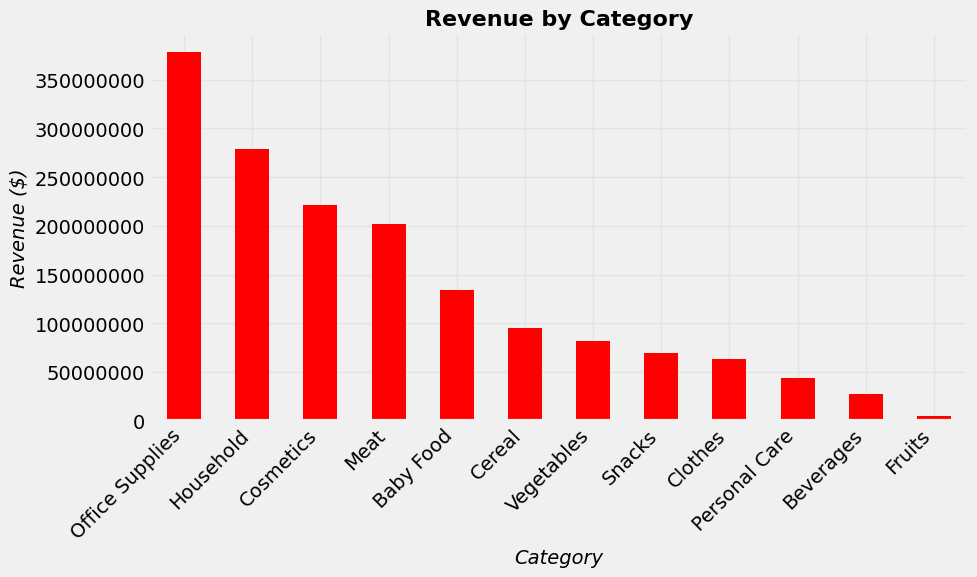

In [ ]:
plt.figure(figsize=(10, 6))
revenue_by_category.plot(kind='bar', color='red')
plt.title("Revenue by Category", fontsize=16, fontweight="bold")
plt.xlabel("Category", fontsize=14, fontstyle="italic")
plt.ylabel("Revenue ($)", fontsize=14, fontstyle="italic")
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Отже, графік показує, що найбільший дохід компанія отримує від продажу товарів з категорії Office Supplies, а найменший - з категорії Fruits.

######витрати

In [ ]:
final_df['total_cost'] = final_df['unit_cost'] * final_df['units_sold']
total_cost_by_category = final_df.groupby('category')['total_cost'].sum().sort_values(ascending=False)
print(f"Total Cost by Category $:\n{total_cost_by_category}")

Total Cost by Category $:
category
Office Supplies    305254265.76
Household          209713962.32
Meat               174372147.22
Cosmetics          133294486.04
Baby Food            83578326.3
Cereal              53901751.26
Vegetables           48421134.3
Snacks              44200830.24
Personal Care       30106787.55
Clothes             20762577.92
Beverages           18374333.89
Fruits                3675454.2
Name: total_cost, dtype: Float64


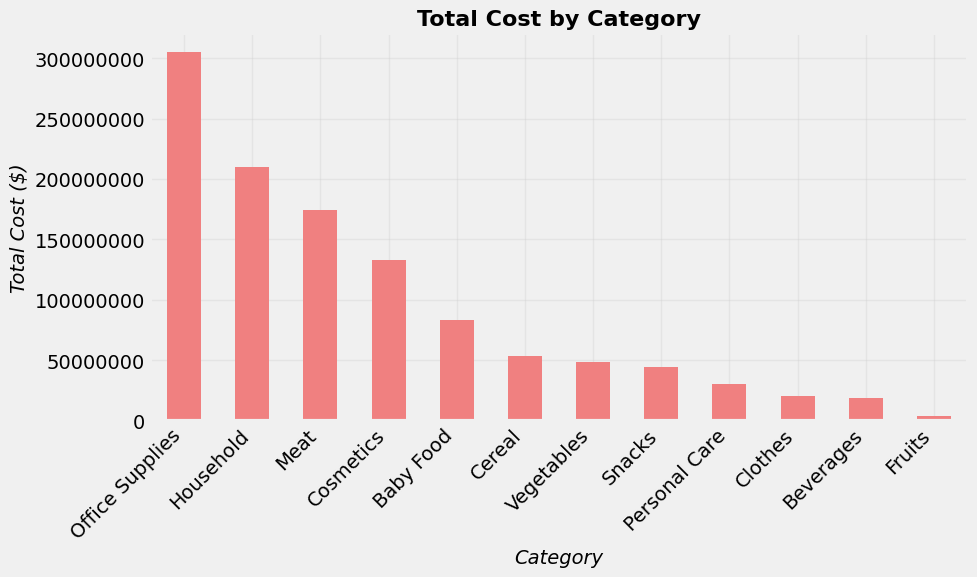

In [ ]:
plt.figure(figsize=(10, 6))
total_cost_by_category.plot(kind='bar', color='lightcoral')
plt.title("Total Cost by Category", fontsize=16, fontweight="bold")
plt.xlabel("Category", fontsize=14, fontstyle="italic")
plt.ylabel("Total Cost ($)", fontsize=14, fontstyle="italic")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Отже, графік показує, що найбільші загальні витрати компанія витрачає на виробництво товарів з категорії Office Supplies, а найменші - з категорії Fruits.

######прибутки

In [ ]:
profit_by_category = final_df.groupby('category')['profit'].sum().sort_values(ascending=False)
print(f"Profit by Category $:\n{profit_by_category}")

Profit by Category $:
category
Cosmetics          88010907.56
Office Supplies    73411976.25
Household          69160454.84
Baby Food           50256042.9
Clothes            42544746.72
Cereal             40774964.94
Vegetables          33617356.3
Meat                27349493.6
Snacks             25012661.94
Personal Care       13313500.9
Beverages           9051339.06
Fruits              1280035.35
Name: profit, dtype: Float64


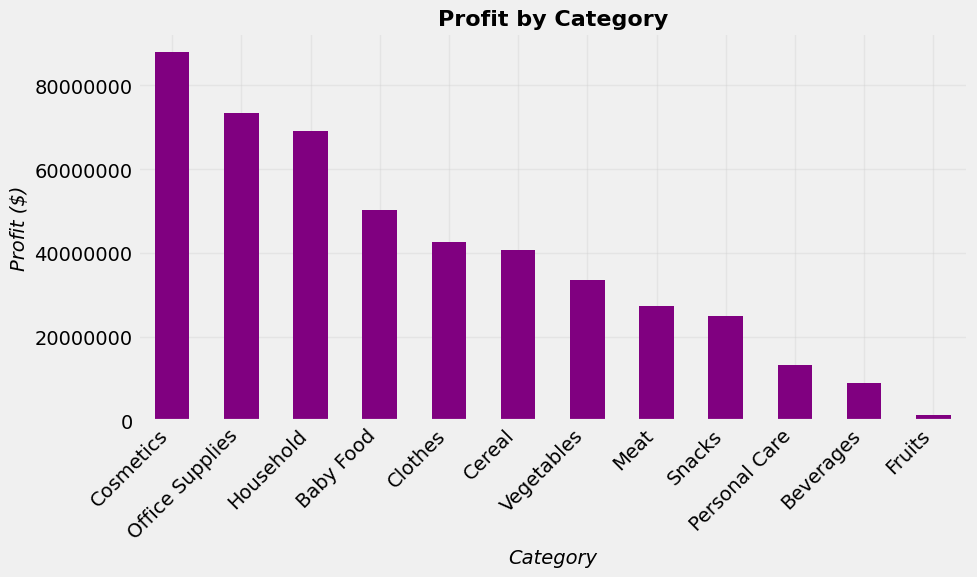

In [ ]:
plt.figure(figsize=(10, 6))
profit_by_category.plot(kind='bar', color='purple')
plt.title("Profit by Category", fontsize=16, fontweight="bold")
plt.xlabel("Category", fontsize=14, fontstyle="italic")
plt.ylabel("Profit ($)", fontsize=14, fontstyle="italic")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Отже, графік показує, що найбільший прибуток компанія отримує від продажу товарів з категорії Cosmetics, а найменший - з категорії Fruits.

######популярність товарів

In [ ]:
units_sold_by_category = final_df.groupby('category')['units_sold'].sum().sort_values(ascending=False)
print(f"Units Sold by Category:\n{units_sold_by_category}")

Units Sold by Category:
category
Office Supplies    581481
Clothes            579313
Beverages          577991
Vegetables         532510
Personal Care      531265
Fruits             531135
Baby Food          524265
Cosmetics          506188
Meat               478138
Cereal             460266
Snacks             453621
Household          417308
Name: units_sold, dtype: Int64


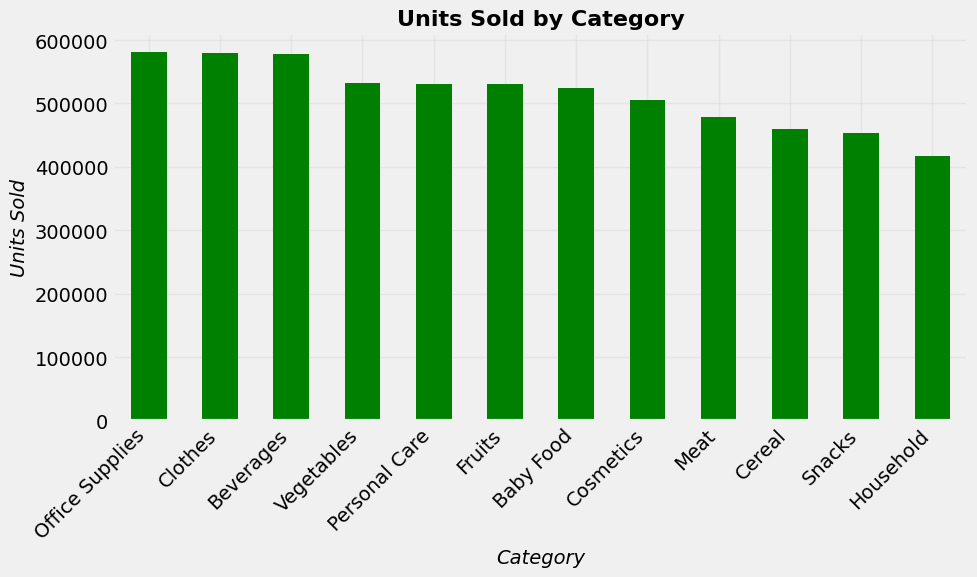

In [ ]:
plt.figure(figsize=(10, 6))
units_sold_by_category.plot(kind='bar', color='green')
plt.title("Units Sold by Category", fontsize=16, fontweight="bold")
plt.xlabel("Category", fontsize=14, fontstyle="italic")
plt.ylabel("Units Sold", fontsize=14, fontstyle="italic")
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Отже, графік показує, що найпопулярніші товари, які продаються більше, ніж інші, з категорії Office Supplies, а найменш популярні - з категорії Household.

#####географії (країн, регіонів)

######доходи

In [ ]:
revenue_by_country = final_df.groupby('country')['revenue'].sum().sort_values(ascending=False)
print(f"Revenue by Country $:\n{revenue_by_country}")

Revenue by Country $:
country
Czech Republic            53543932.14
Ukraine                   53252317.54
Bosnia and Herzegovina    50117508.49
Macedonia                 49222085.25
San Marino                47883708.48
Andorra                   47756693.17
Portugal                  47172189.84
Malta                     47145320.81
Russia                    46051659.81
Slovakia                  42940998.32
Hungary                   42408249.12
Serbia                    42193537.74
France                    39362112.15
Slovenia                  38892531.27
Latvia                    38722084.15
Greece                     38699541.7
Bulgaria                   38161555.7
Germany                   38055087.56
Armenia                   37519840.21
Italy                     35878352.12
Austria                   35740871.49
Sweden                    35482128.02
Romania                   34286150.85
Belarus                   34236260.77
Poland                    33805403.22
Luxembourg          

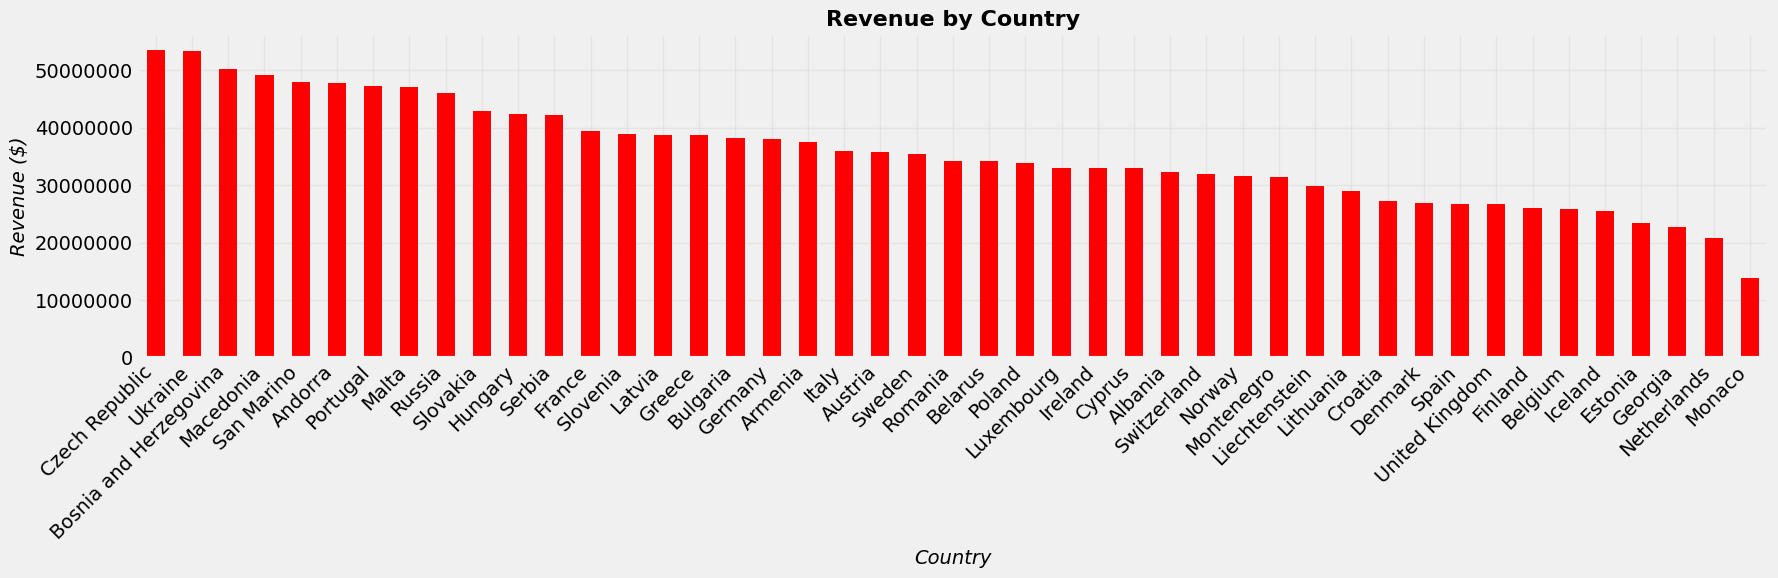

In [ ]:
plt.figure(figsize=(18, 6))
revenue_by_country.plot(kind='bar', color='red')
plt.title("Revenue by Country", fontsize=16, fontweight="bold")
plt.xlabel("Country", fontsize=14, fontstyle="italic")
plt.ylabel("Revenue ($)", fontsize=14, fontstyle="italic")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Отже, графік показує, що найбільший дохід компанія отримує від продажу товарів у Czech Republic, а найменший - у Monaco.

######витрати

In [ ]:
total_cost_by_country = final_df.groupby('country')['total_cost'].sum().sort_values(ascending=False)
print(f"Total Cost by Country $:\n{total_cost_by_country}")

Total Cost by Country $:
country
Czech Republic            39908338.36
Ukraine                    38447391.8
Bosnia and Herzegovina    36859905.72
Portugal                  35826782.25
Macedonia                  35537985.3
San Marino                34090715.67
Russia                    32783977.17
Malta                     32535192.93
Andorra                   32346656.54
Slovakia                  30888208.29
Serbia                    30340023.36
Hungary                   28622018.09
France                    28519766.49
Armenia                   28097487.03
Latvia                    27962798.86
Bulgaria                  27753213.09
Slovenia                  26769006.75
Germany                   26472168.46
Greece                    26375091.57
Austria                   25713361.85
Italy                     24964430.15
Sweden                    24326799.43
Romania                   23492602.16
Luxembourg                 23204611.1
Ireland                    23191857.6
Poland           

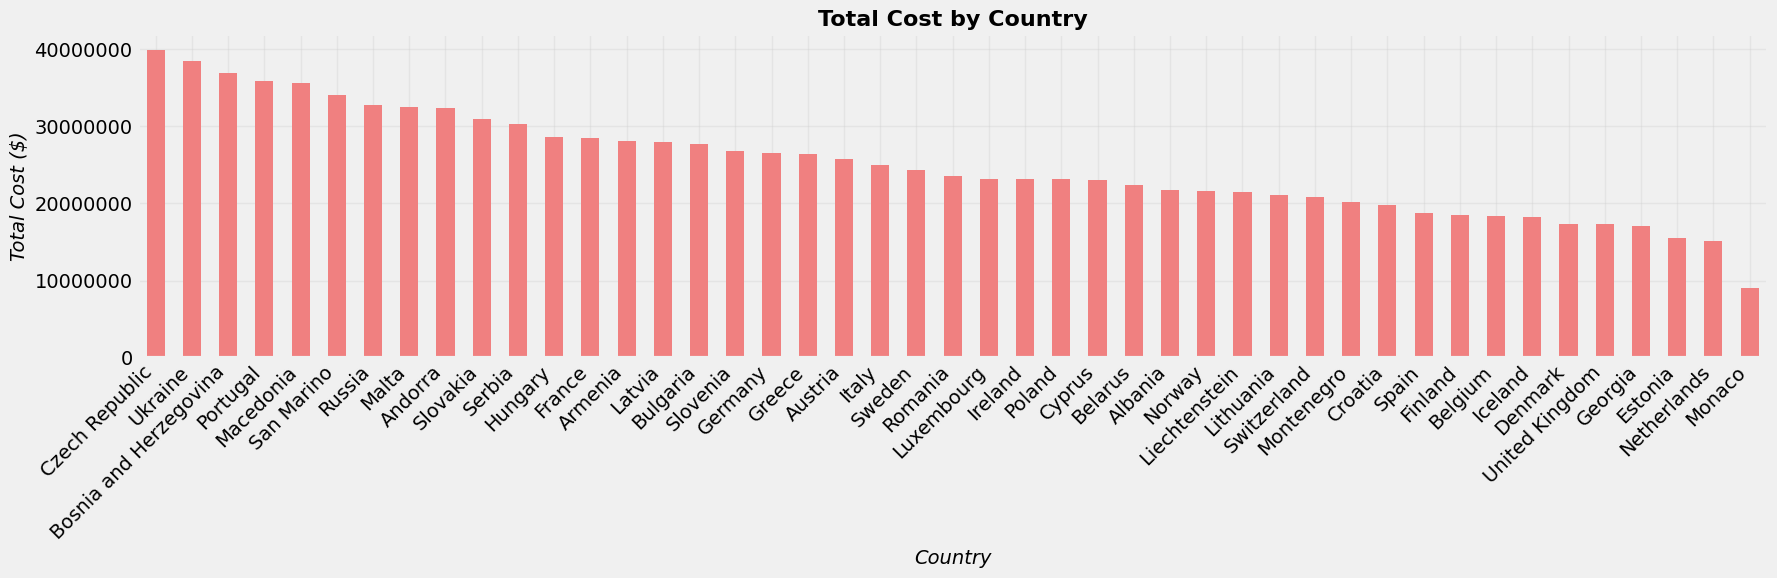

In [ ]:
plt.figure(figsize=(18, 6))
total_cost_by_country.plot(kind='bar', color='lightcoral')
plt.title("Total Cost by Country", fontsize=16, fontweight="bold")
plt.xlabel("Country", fontsize=14, fontstyle="italic")
plt.ylabel("Total Cost ($)", fontsize=14, fontstyle="italic")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Отже, графік показує, що найбільші загальні витрати компанія витрачає на виробництво товарів для Czech Republic, а найменші - для Monaco.

######прибутки

In [ ]:
profit_by_country = final_df.groupby('country')['profit'].sum().sort_values(ascending=False)
print(f"Profit by Country $:\n{profit_by_country}")

Profit by Country $:
country
Andorra                   15410036.63
Ukraine                   14804925.74
Malta                     14610127.88
San Marino                13792992.81
Hungary                   13786231.03
Macedonia                 13684099.95
Czech Republic            13635593.78
Russia                    13267682.64
Bosnia and Herzegovina    13257602.77
Greece                    12324450.13
Slovenia                  12123524.52
Slovakia                  12052790.03
Serbia                    11853514.38
Belarus                   11852421.05
Germany                    11582919.1
Portugal                  11345407.59
Montenegro                11169660.56
Sweden                    11155328.59
Switzerland                11037297.6
Italy                     10913921.97
France                    10842345.66
Romania                   10793548.69
Latvia                    10759285.29
Poland                    10671100.99
Albania                   10490706.02
Bulgaria             

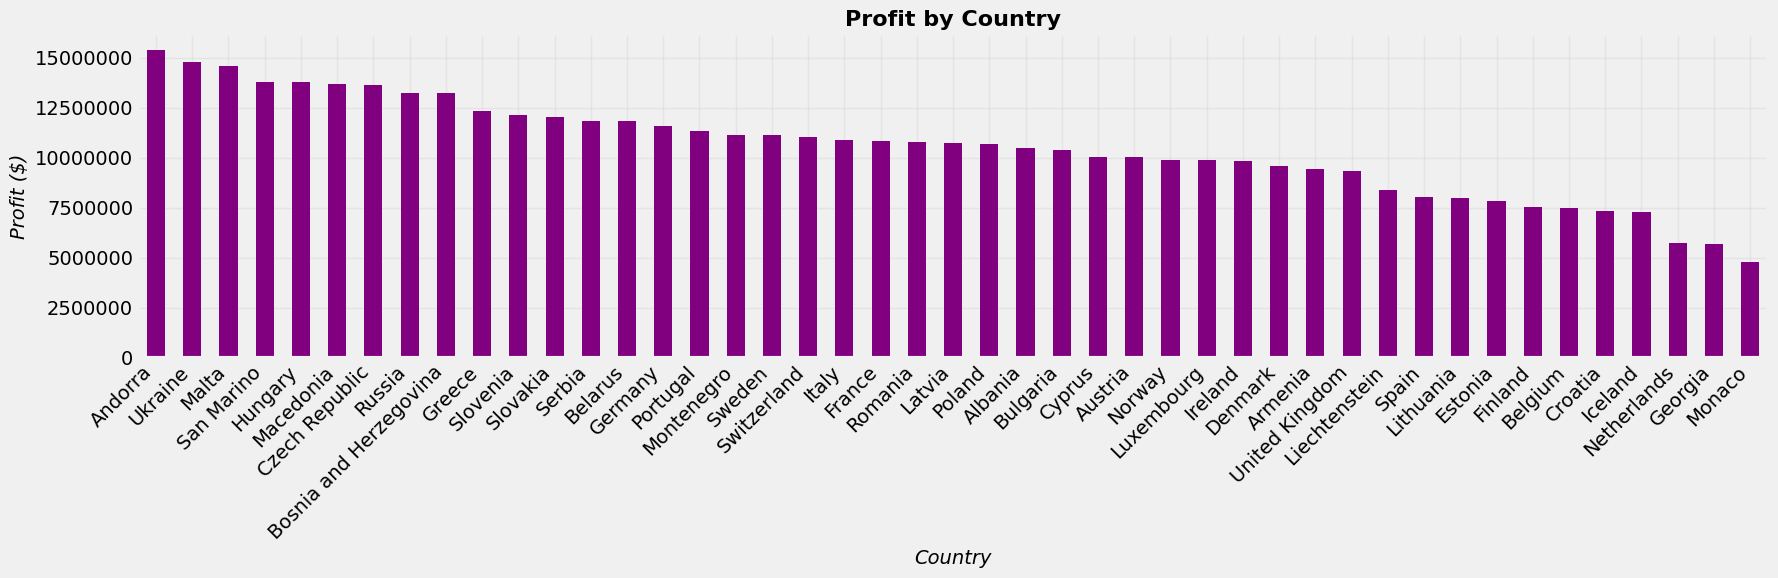

In [ ]:
plt.figure(figsize=(18, 6))
profit_by_country.plot(kind='bar', color='purple')
plt.title("Profit by Country", fontsize=16, fontweight="bold")
plt.xlabel("Country", fontsize=14, fontstyle="italic")
plt.ylabel("Profit ($)", fontsize=14, fontstyle="italic")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Отже, графік показує, що найбільший прибуток компанія отримує від продажу товарів у Andorra, а найменший - у Monaco.

######популярність товарів

In [ ]:
units_sold_by_country = final_df.groupby('country')['units_sold'].sum().sort_values(ascending=False)
print(f"Units Sold by Country:\n{units_sold_by_country}")

Units Sold by Country:
country
Macedonia                 203078
San Marino                192228
Andorra                   185686
Greece                    176859
Malta                     173641
Serbia                    170369
Romania                   166882
Russia                    165954
Ukraine                   164577
Cyprus                    158743
Italy                     156781
Slovenia                  156479
Bosnia and Herzegovina    153545
Belarus                   153432
Hungary                   152242
Armenia                   150665
Latvia                    150525
Bulgaria                  150088
Austria                   145573
Switzerland               144320
Czech Republic            142446
Ireland                   140340
Norway                    138106
Montenegro                137200
France                    137043
Sweden                    132251
Spain                     132014
Slovakia                  131540
Germany                   130984
Denmark     

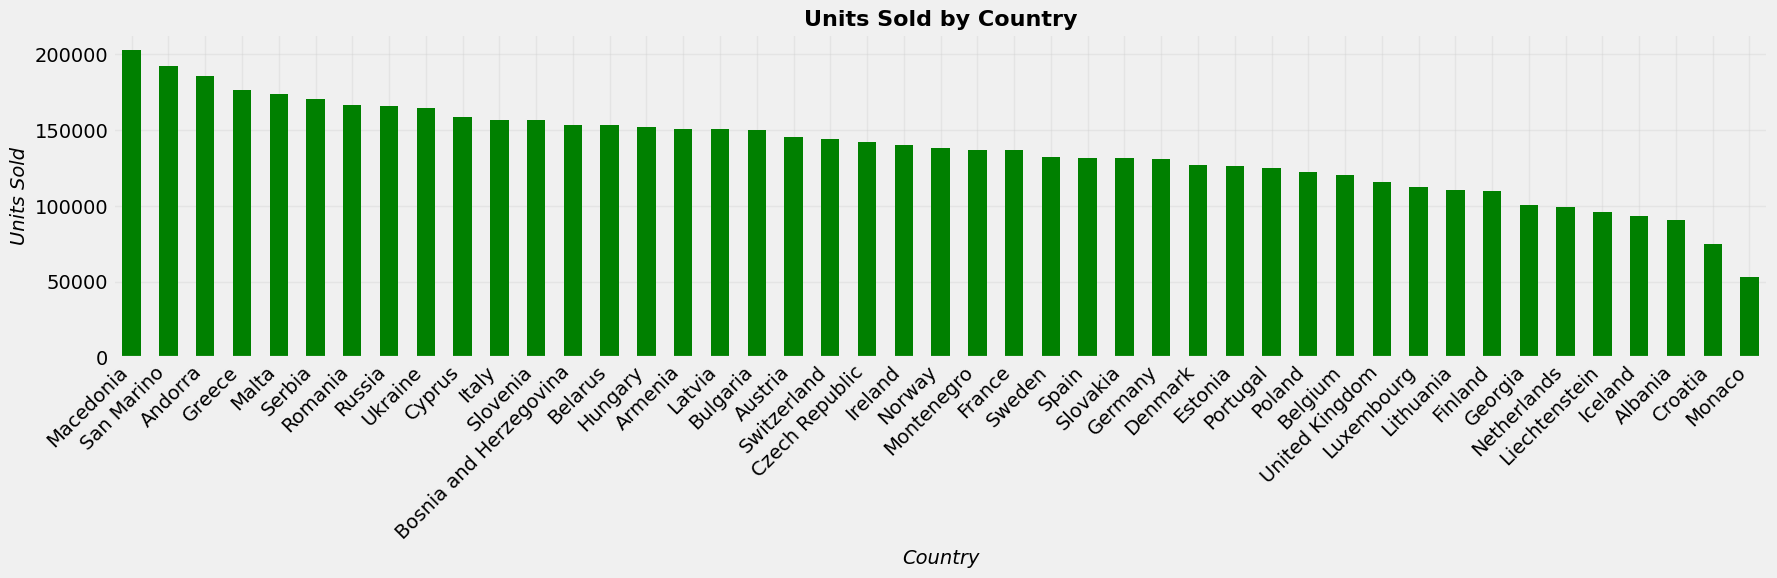

In [ ]:
plt.figure(figsize=(18, 6))
units_sold_by_country.plot(kind='bar', color='green')
plt.title("Units Sold by Country", fontsize=16, fontweight="bold")
plt.xlabel("Country", fontsize=14, fontstyle="italic")
plt.ylabel("Units Sold", fontsize=14, fontstyle="italic")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Отже, графік показує, що товари є найпопулярнішими у Macedonia, а найменша кількість проданих товарів у Monaco.

#####каналів продажу (онлайн або офлайн).

######доходи

sales_channel
Offline    810486241.34
Online     788953296.02
Name: revenue, dtype: Float64


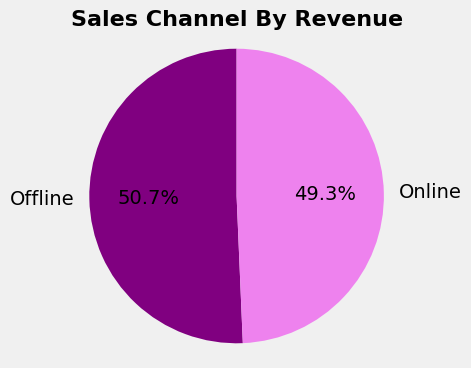

In [ ]:
grouped_channels_by_revenue = final_df.groupby("sales_channel")["revenue"].sum()
print(grouped_channels_by_revenue)
colors = ['purple', 'violet']
plt.style.use("fivethirtyeight")
plt.figure(figsize=(4, 4))
plt.pie(grouped_channels_by_revenue, labels=grouped_channels_by_revenue.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Sales Channel By Revenue", fontsize=16, fontweight="bold")
plt.axis('equal')
plt.show()

Отже, графік показує, що найбільший дохід компанія отримує від продажу товарів через Offline, а менший через Online. Але значення майже однакові, тобто і дохід майже однаковий з кожного з калалу продажів.

######витрати


sales_channel
Offline    571900468.63
Online     553755588.37
Name: total_cost, dtype: Float64


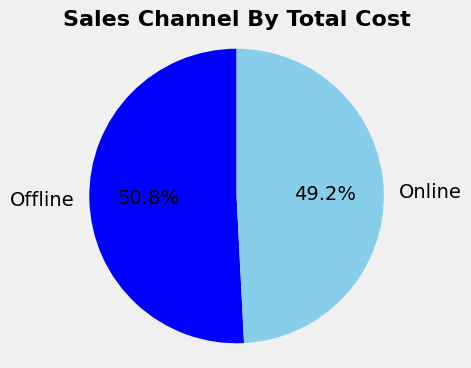

In [ ]:
grouped_channels_by_cost = final_df.groupby("sales_channel")["total_cost"].sum()
print(grouped_channels_by_cost)
colors = ['blue', 'skyblue']
plt.style.use("fivethirtyeight")
plt.figure(figsize=(4, 4))
plt.pie(grouped_channels_by_cost, labels=grouped_channels_by_cost.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Sales Channel By Total Cost", fontsize=16, fontweight="bold")
plt.axis('equal')
plt.show()

Отже, графік показує, що найбільші витрати компанія має від продажу товарів через Offline, а менший через Online. Але значення майже однакові, тобто і витрати майже однакові з кожного з калалу продажів.

######прибутки

sales_channel
Offline    238585772.71
Online     235197707.65
Name: profit, dtype: Float64


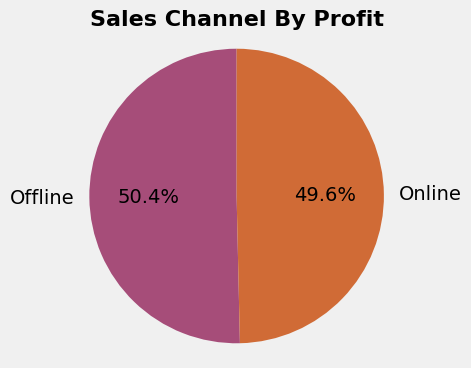

In [ ]:
grouped_channels_by_profit = final_df.groupby("sales_channel")["profit"].sum()
print(grouped_channels_by_profit)
colors = ['#A64D79', '#D06B36']
plt.style.use("fivethirtyeight")
plt.figure(figsize=(4, 4))
plt.pie(grouped_channels_by_profit, labels=grouped_channels_by_profit.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Sales Channel By Profit", fontsize=16, fontweight="bold")
plt.axis('equal')
plt.show()

Отже, графік показує, що найбільший прибуток компанія отримує від продажу товарів через Offline, а менший через Online. Але значення майже однакові, тобто і прибуток майже однаковий з кожного з калалу продажів.

######популярність товарів

sales_channel
Offline    3115222
Online     3058259
Name: units_sold, dtype: Int64


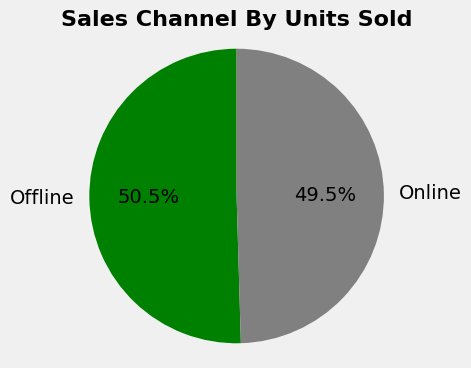

In [ ]:
grouped_channels_by_units_sold = final_df.groupby("sales_channel")["units_sold"].sum()
print(grouped_channels_by_units_sold)
colors = ['green', 'grey']
plt.style.use("fivethirtyeight")
plt.figure(figsize=(4, 4))
plt.pie(grouped_channels_by_units_sold, labels=grouped_channels_by_units_sold.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Sales Channel By Units Sold", fontsize=16, fontweight="bold")
plt.axis('equal')
plt.show()

Отже, графік показує, що більш популярний канал - Offline, а менш популярний - Online. Але значення майже однакові, тобто ці канали продажів однаково популярні.

Offline та Online канали продажу однакові по усім показникам, тобто, доходи, витрати, прибуток та популярність товарів мають однакові значення за каналами продажів.

####Проаналізуй інтервал часу між замовленням та його відвантаженням та зроби відповідні візуалізації в розрізі:

* категорій товарів;
* країн;
* регіонів.

######категорій товарів

In [ ]:
avg_delivery_time_by_category = final_df.groupby('category')['delivery_time'].mean().sort_values(ascending=False)
print(avg_delivery_time_by_category)

category
Office Supplies    27.283186
Cereal             27.198020
Baby Food          26.647619
Cosmetics          25.879630
Meat               25.669903
Snacks             25.263158
Fruits             24.475728
Vegetables         24.438095
Beverages          23.946903
Household          23.571429
Clothes            23.539216
Personal Care      20.403670
Name: delivery_time, dtype: float64


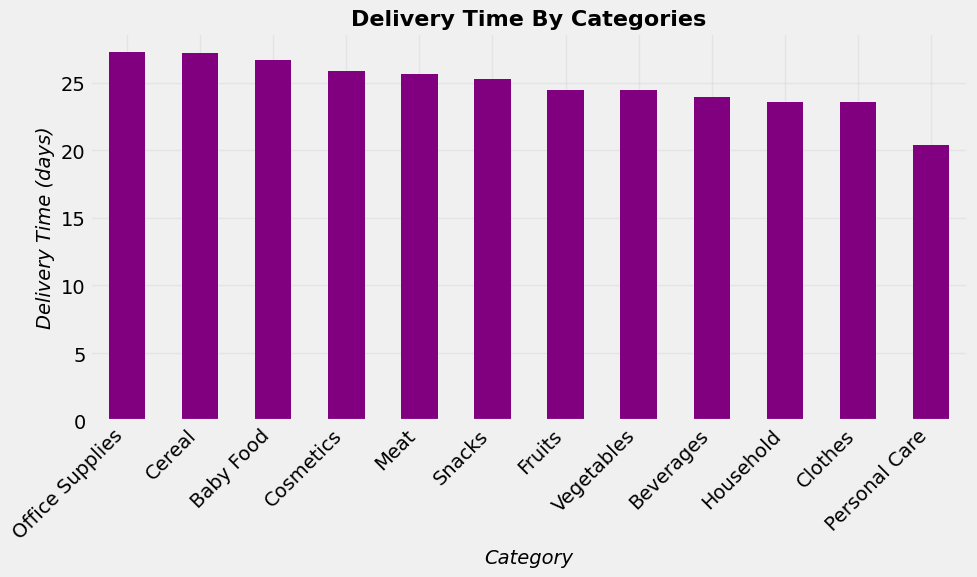

In [ ]:
plt.figure(figsize=(10, 6))
avg_delivery_time_by_category.plot(kind='bar', color='purple')
plt.title("Delivery Time By Categories", fontsize=16, fontweight="bold")
plt.xlabel("Category", fontsize=14, fontstyle="italic")
plt.ylabel("Delivery Time (days)", fontsize=14, fontstyle="italic")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Середній час між замовленням та відвантаженням (у днях) найдовший у категорії Office Supplies (27 днів), а найкоротший у категорії Personal Care (20 днів).

######країн

In [ ]:
avg_delivery_time_by_country = final_df.groupby('country')['delivery_time'].mean().sort_values(ascending=False)
print(avg_delivery_time_by_country)

country
Hungary                   32.640000
Georgia                   29.695652
Austria                   28.500000
Slovakia                  28.466667
Luxembourg                27.750000
Lithuania                 27.560000
Poland                    27.464286
Russia                    27.375000
Monaco                    26.846154
Bulgaria                  26.800000
Montenegro                26.678571
Netherlands               26.625000
Belgium                   26.538462
France                    26.423077
Andorra                   26.275000
Finland                   26.217391
Albania                   26.190476
Armenia                   26.172414
Spain                     26.153846
Bosnia and Herzegovina    26.060606
Ukraine                   25.757576
Belarus                   25.250000
Czech Republic            25.225806
Italy                     25.200000
Sweden                    25.137931
Romania                   24.941176
Portugal                  24.120000
Norway              

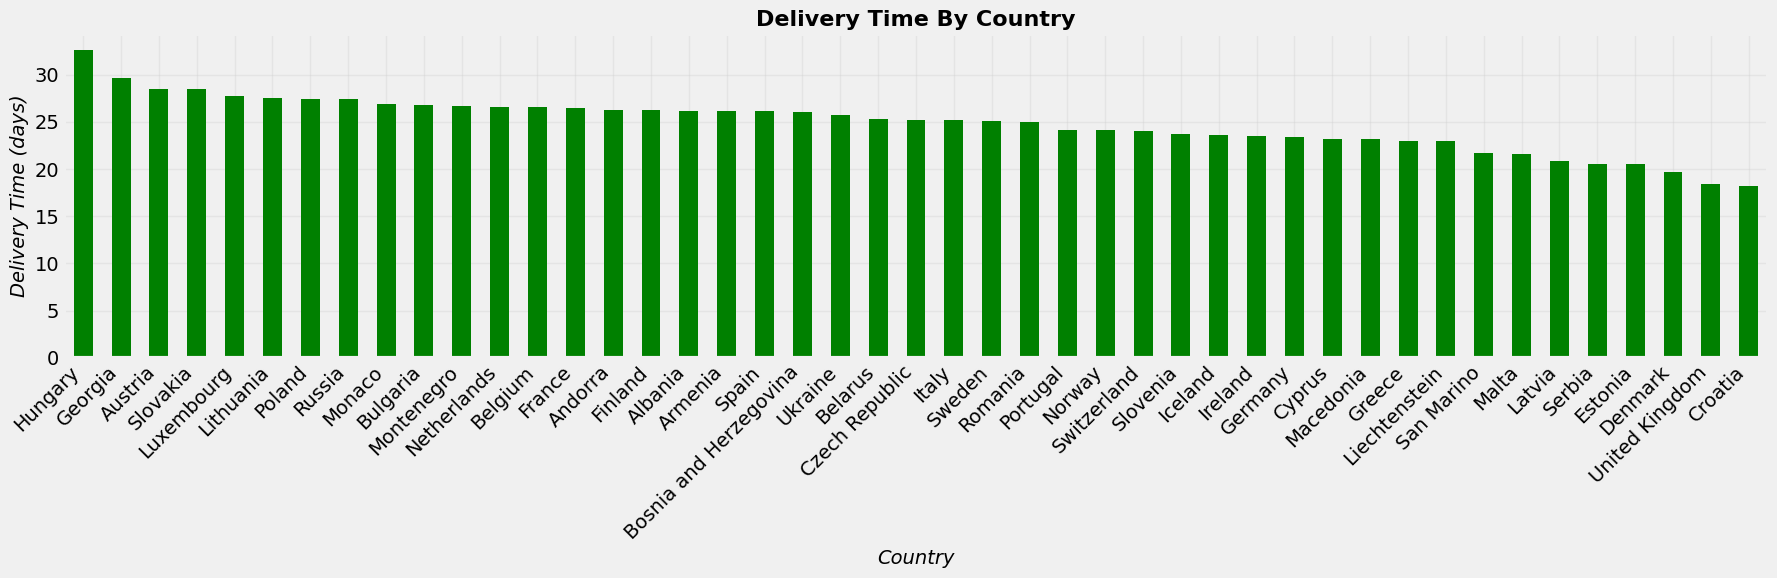

In [ ]:
plt.figure(figsize=(18, 6))
avg_delivery_time_by_country.plot(kind='bar', color='green')
plt.title("Delivery Time By Country", fontsize=16, fontweight="bold")
plt.xlabel("Country", fontsize=14, fontstyle="italic")
plt.ylabel("Delivery Time (days)", fontsize=14, fontstyle="italic")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Середній час між замовленням та відвантаженням у днях найдовший у Hungary (32 дня), а найкоротший у Croatia (18 днів).

######регіонів.


In [ ]:
avg_delivery_time_by_region = final_df.groupby('region')['delivery_time'].mean()
print(avg_delivery_time_by_region)

region
Asia      26.085366
Europe    24.777873
Name: delivery_time, dtype: float64


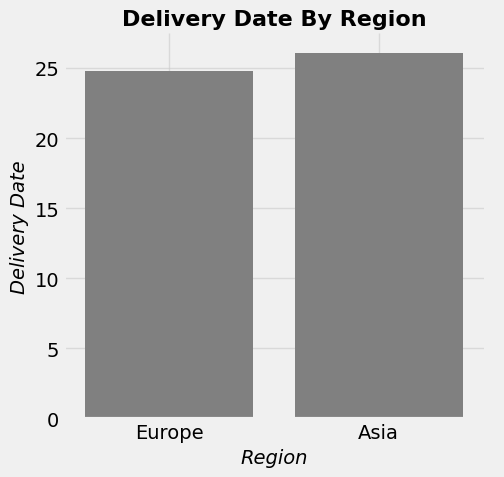

In [ ]:
sns.catplot(x="region", y="delivery_time", kind="bar", errorbar=("ci", False), color='grey', data=final_df)
plt.title("Delivery Date By Region", fontsize=16, fontweight="bold")
plt.xlabel("Region", fontsize=14, fontstyle="italic")
plt.ylabel("Delivery Date", fontsize=14, fontstyle="italic")

plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

Середній час між замовленням та відвантаженням у днях: Asia - 26 днів,
Europe - 24 дні.

####Проаналізуй, чи залежить прибуток від часу, необхідного на відвантаження товару. Зроби потрібні для цього агрегування та візуалізації.

In [ ]:
profit_by_delivery_time = final_df.groupby('delivery_time')['profit'].mean()

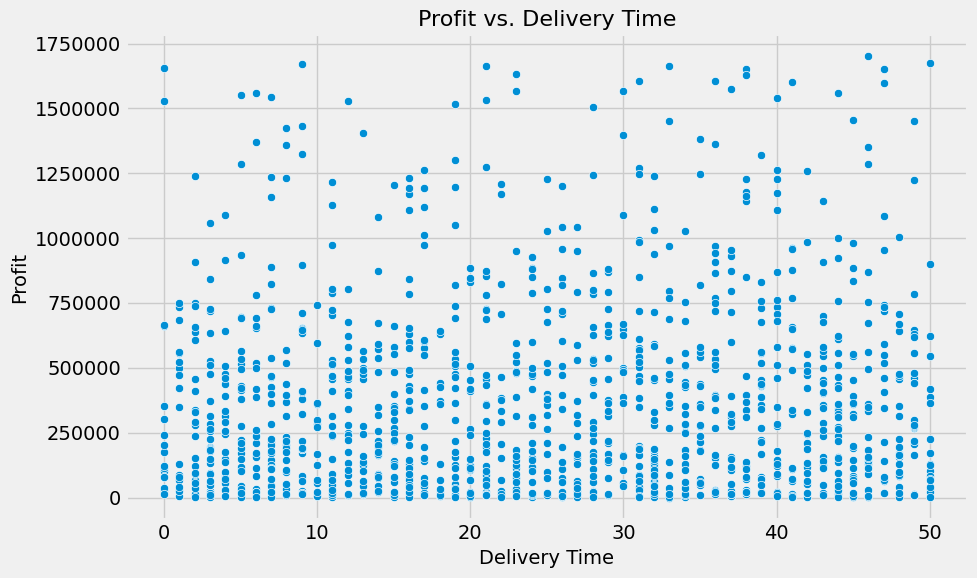

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='delivery_time', y='profit', data=final_df)
plt.xlabel('Delivery Time', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.title('Profit vs. Delivery Time', fontsize=16)
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.tight_layout()
plt.show()

На графіку можна побачити, що немає чіткої залежності між прибутком та часом, який потрібен на відвантаження. Час доставки не є основним фактором, від якого залежить прибуток компанії. Немає чіткого тренда на спадання чи зростання прибутку від часу доставки.

####Проаналізуй за допомогою візуалізації динаміку продажів (у часі) у розрізі категорій товарів, країн, регіонів, визнач основні тенденції.

######категорій товарів

In [ ]:
if final_df['order_date'].dtype != 'datetime64[ns]':
  final_df['order_date'] = pd.to_datetime(final_df['order_date'])
final_df = final_df.set_index('order_date')

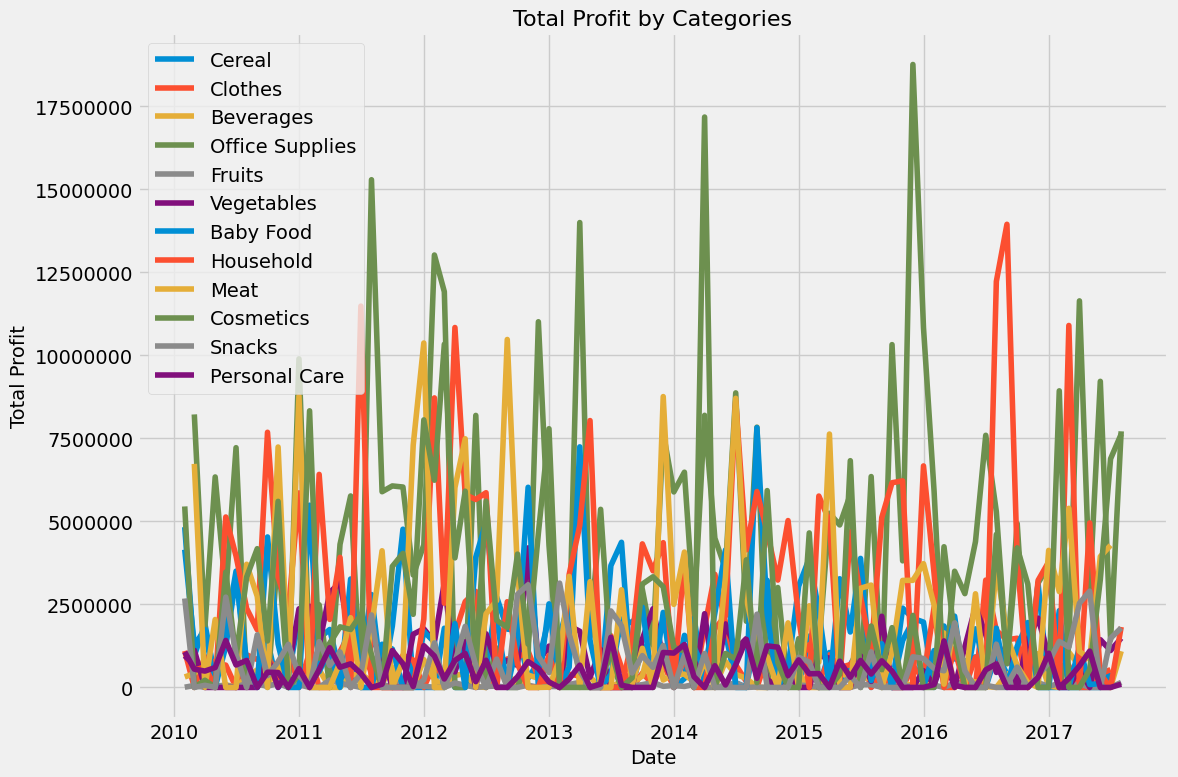

In [ ]:
plt.figure(figsize=(12, 8))
for category in final_df['category'].unique():
    category_sales = final_df[final_df['category'] == category].resample('ME')['revenue'].sum()
    plt.plot(category_sales.index, category_sales.values, label=category)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.title('Total Profit by Categories', fontsize=16)
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()

Аналізуючи  динаміку продажів (у часі) у розрізі категорій товарів, можна побачити, що чіткої тенденції немає. Є постійні коливання, чіткого зростання або спадання прибутку по категоріям не виявлено.
Деякі категорії (Cosmetics, Household, Food) мають більші викіди - зростання прибутку в певні періоди часу.


######країн

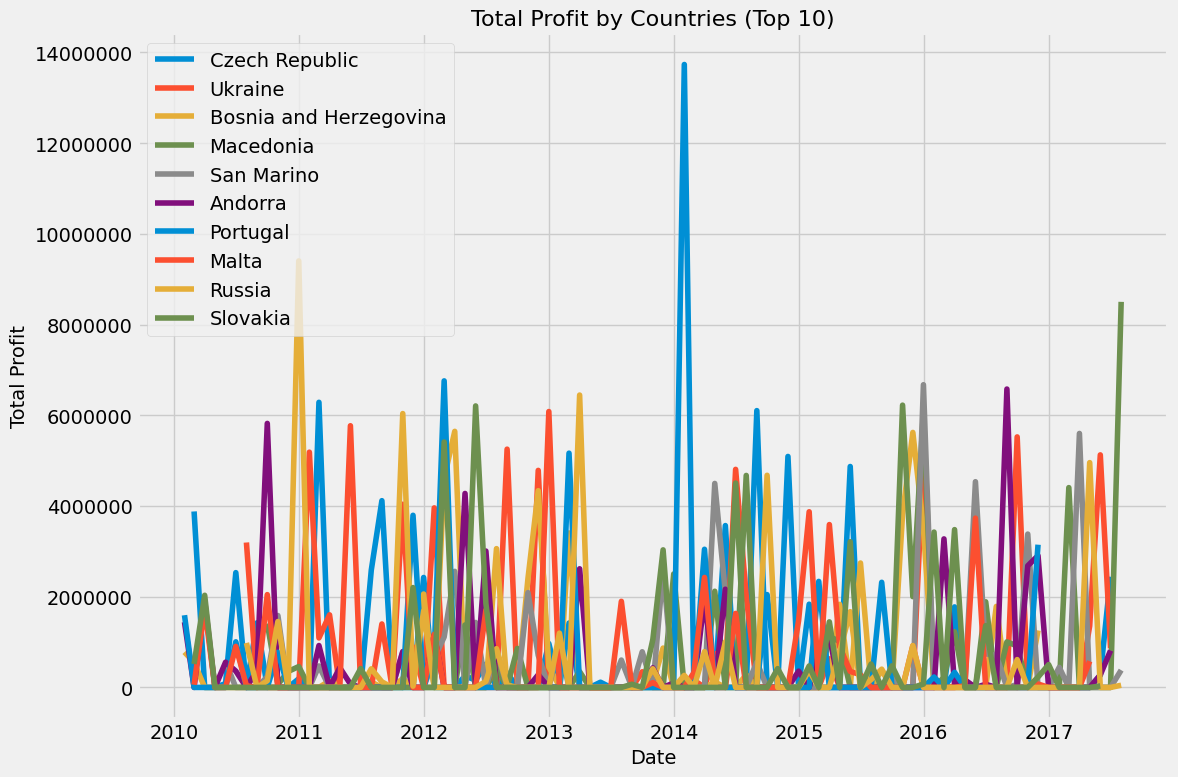

In [ ]:
top_10_countries = final_df.groupby('country')['revenue'].sum().nlargest(10).index
plt.figure(figsize=(12, 8))
for country in top_10_countries:
    country_sales = final_df[final_df['country'] == country].resample('ME')['revenue'].sum()
    plt.plot(country_sales.index, country_sales.values, label=country)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.title('Total Profit by Countries (Top 10)', fontsize=16)
plt.legend(loc='upper left')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()

Аналізуючи  динаміку продажів (у часі) у розрізі країн (Top 10), можна побачити, що між країнами є значна різниця у розмірі прибутку.
Наприклад, у Czech Republic значно збільшився прибуток у 2014 році.
Чіткої сезонності немає.

######регіонів

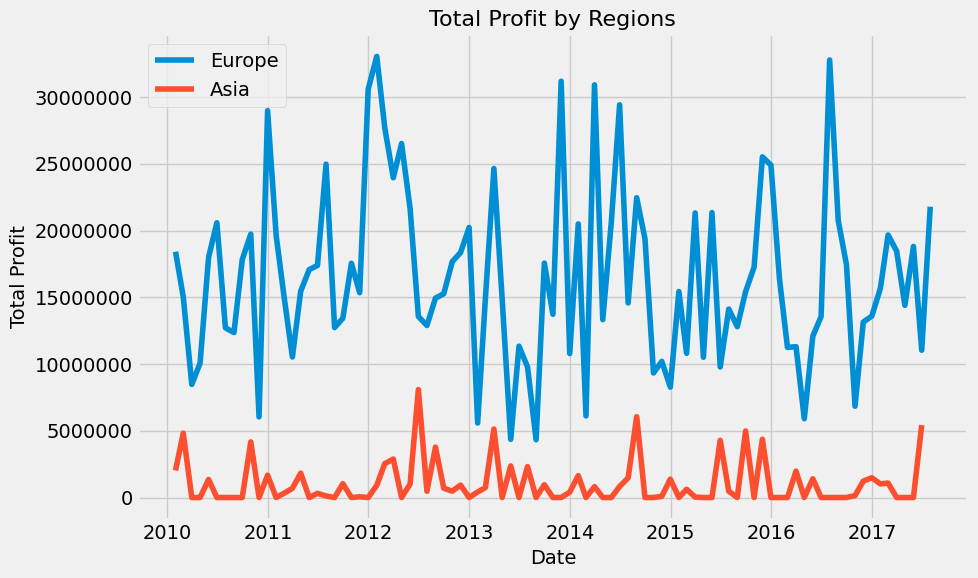

In [ ]:
plt.figure(figsize=(10, 6))
for region in final_df['region'].unique():
    region_sales = final_df[final_df['region'] == region].resample('ME')['revenue'].sum()
    plt.plot(region_sales.index, region_sales.values, label=region)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.title('Total Profit by Regions', fontsize=16)
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()

Аналізуючи динаміку продажів (у часі) у розрізі регіонів, можна побачити, що прибуток по Європі значно більший, ніж по Азії у загальному. Але Азія більш стабільна, у Європі спостерігаються значні коливання. Спостерігається певна синхронність у змінах прибутку в обох регіонах, що може свідчити про вплив глобальних факторів.

####Проведи аналіз продажів товарів за днями тижня. Чи можна деякі товари вважати сезонними? Для знаходження дня тижня за датою скористайся методом day_name().

######аналіз продажів за днями тижня

In [ ]:
final_df['day_of_week'] = final_df.index.day_name()

In [ ]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
final_df['day_of_week'] = pd.Categorical(final_df['day_of_week'], categories=days_order, ordered=True)

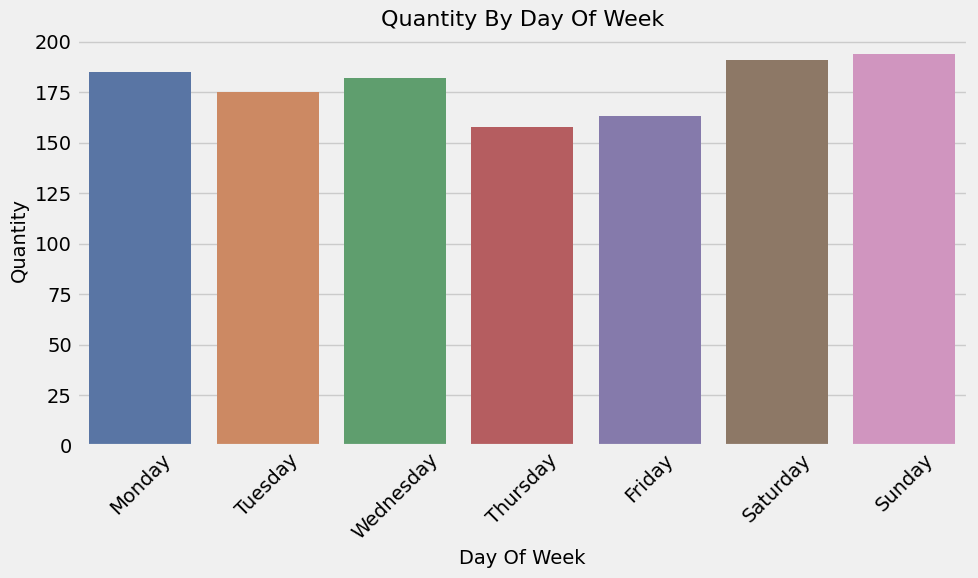

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', hue= 'day_of_week', data=final_df, palette="deep", legend = False)
plt.title('Quantity By Day Of Week', fontsize=16)
plt.xlabel('Day Of Week', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Можна побачити, що загалом цілком стабільні протягом тижня, немає чітких спадів або зростань. Продажі більші у Saturday та Sunday, але не критично більші.

######аналіз продажів товарів за днями тижня

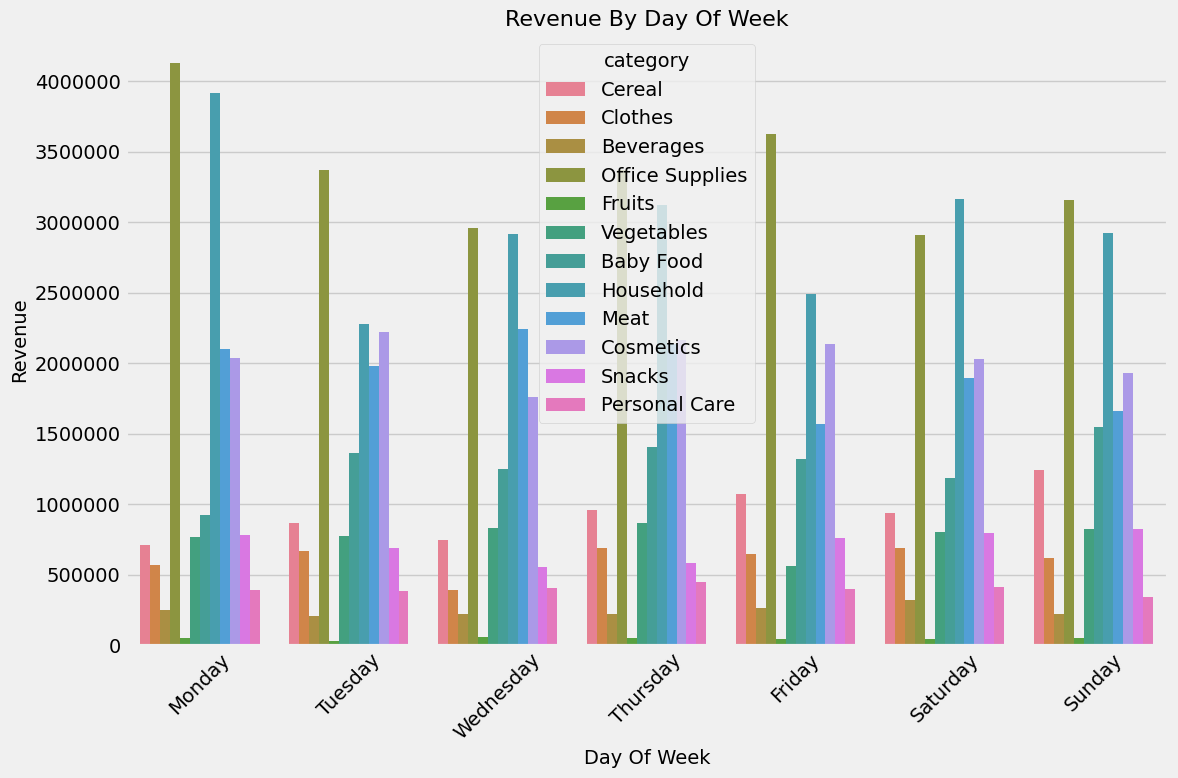

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=final_df, x="day_of_week", y="revenue", hue="category", errorbar=("ci", False))
plt.title("Revenue By Day Of Week", fontsize=16)
plt.xlabel('Day Of Week', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

Якщо оцінювати продажі товарів різних категорій по доходу за дні тижня, то можна побачити, що в загальному дохід по окремим категоріям є стабільним. Є незначні коливання, більш помітні у категоріях Household та Office Supplies, тому що у цих категоріях дохід вищий.

######Аналіз сезонності товарів за місяцями по категоріям

In [ ]:
if not isinstance(final_df.index, pd.DatetimeIndex):
    final_df['order_date'] = pd.to_datetime(final_df['order_date'])
    final_df = final_df.set_index('order_date')

final_df['month_name'] = final_df.index.month_name()

In [ ]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_df['month_name'] = pd.Categorical(final_df['month_name'], categories=months_order, ordered=True)

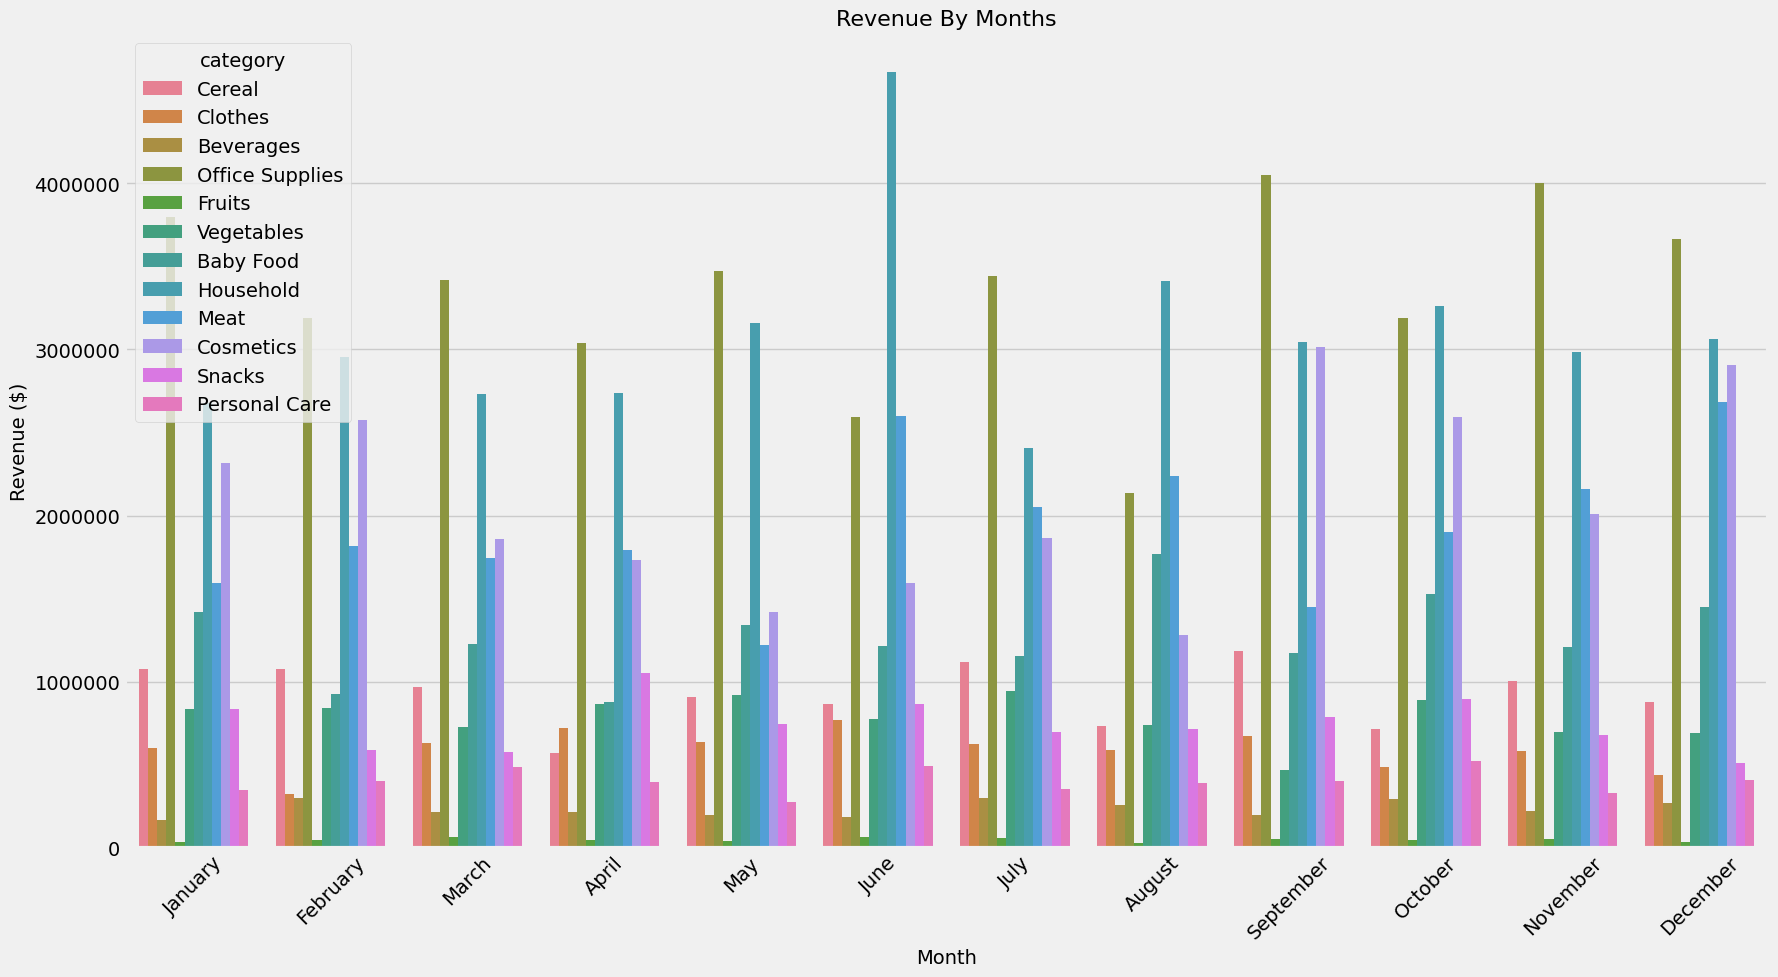

In [ ]:
plt.figure(figsize=(18, 10))
sns.barplot(data=final_df, x="month_name", y="revenue", hue="category", errorbar=("ci", False))
plt.title("Revenue By Months", fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Revenue ($)', fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

На основі графіка можна стверджувати, що категорії Clothes, Fruits та Vegetables - це сезонні товари, тому що показники (на цьому графіку - дохід) збільшуються у окремі місяці. Товари інших категорій не сильно залежать від сезонності, попит на них сильно не змінюється в залежності від місяця.

###4. Reporting. Склади детальний звіт у файлі Google Colab із кодом, графіками та поясненнями. Зроби висновки з точки зору бізнес-логіки. Цей звіт можна буде використати у резюме як твій реальний кейс проєкту у Data Analytics.

#### Отже маємо дані про діяльність компанії:

+ Загальна кількість замовлень: 1,248;
+ Загальний прибуток:  473.8млн;
+ Загальний дохід: $1.6 млрд;
+ Загальна кількість охоплених країн: 45;


+ Час на доставку товарів (у днях): середній: 24, мінімальний: 0, максимальний: 50;
+ Топ 10 країн за кількістю продажів:
San Marino, Andorra, Romania, Ukraine, Bosnia and Herzegovina, Malta, Greece, Macedonia, Russia, Czech Republic.
+ 10 країн за найбільшим прибутком:
Andorra, Ukraine, Malta, San Marino, Hungary, Macedonia, Czech Republic, Russia, Bosnia and Herzegovina, Greece.



####Проаналізувавши продажі (доходи, витрати, прибутки, популярність товарів) та зробивши відповідні візуалізації в розрізі:
категорій товарів;
географії (країн, регіонів);
каналів продажу (онлайн або офлайн) можна зробити висновок, що:

#####Найбільший дохід компанія отримує від продажу товарів з категорії Office Supplies, а найменший - з категорії Fruits. Найбільші загальні витрати компанія витрачає на виробництво товарів з категорії Office Supplies, а найменші - з категорії Fruits. Найбільший прибуток компанія отримує від продажу товарів з категорії Cosmetics, а найменший - з категорії Fruits. Найпопулярніші товари, які продаються більше, ніж інші, з категорії Office Supplies, а найменш популярні - з категорії Household.

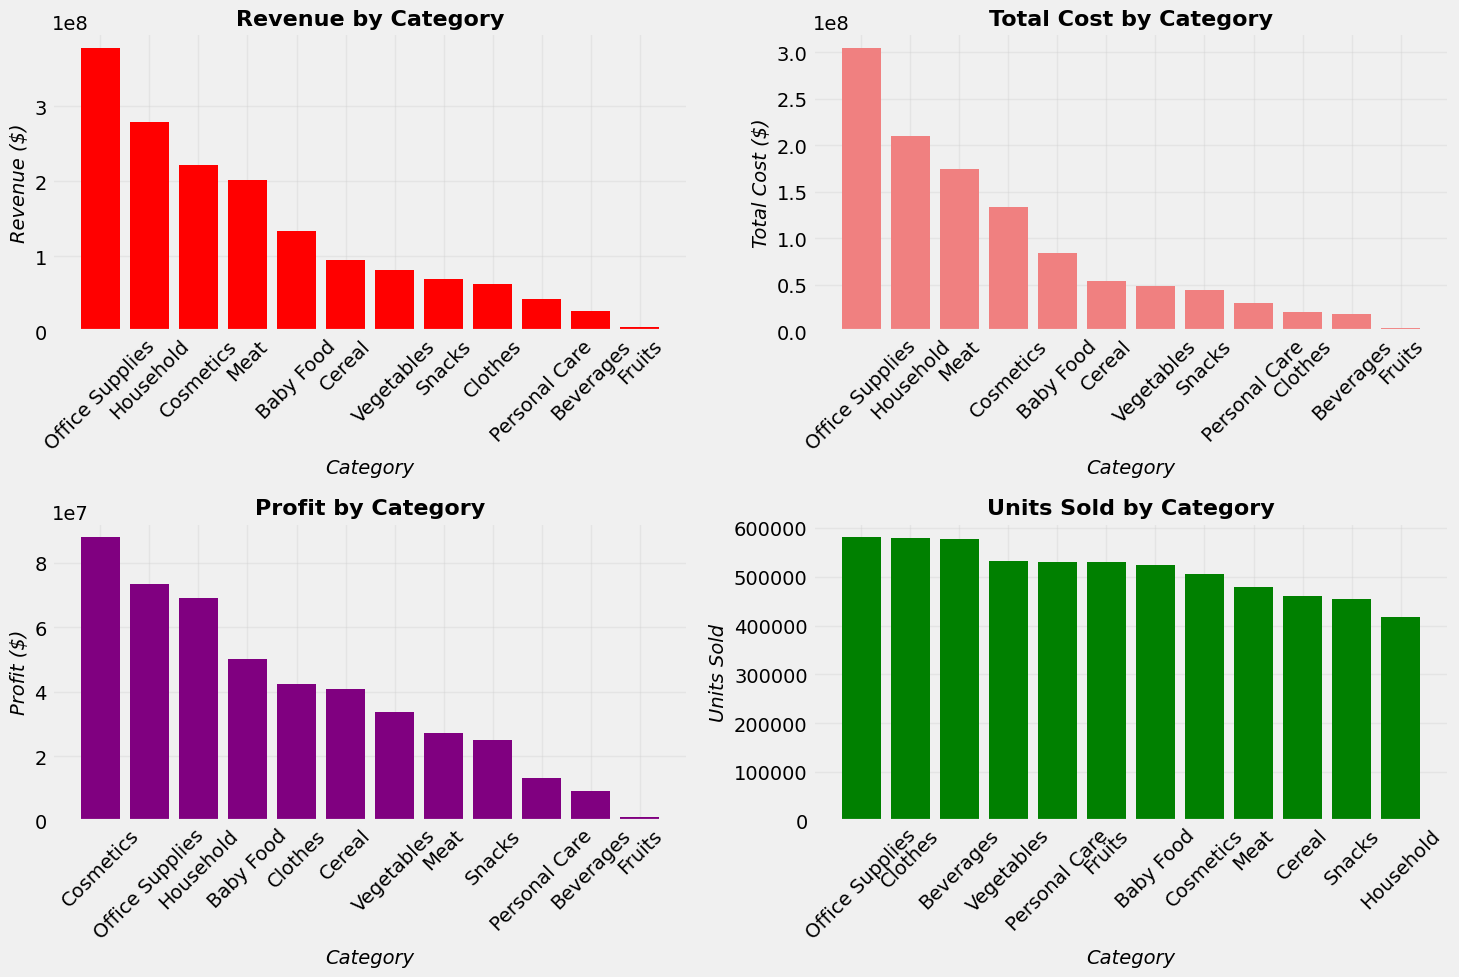

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Revenue by Category
axes[0, 0].bar(revenue_by_category.index, revenue_by_category.values, color='red')
axes[0, 0].set_title("Revenue by Category", fontsize=16, fontweight="bold")
axes[0, 0].set_xlabel("Category", fontsize=14, fontstyle="italic")
axes[0, 0].set_ylabel("Revenue ($)", fontsize=14, fontstyle="italic")
axes[0, 0].set_xticks(revenue_by_category.index)
axes[0, 0].tick_params(axis='y')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)


# Total Cost by Category
axes[0, 1].bar(total_cost_by_category.index, total_cost_by_category.values, color='lightcoral')
axes[0, 1].set_title("Total Cost by Category", fontsize=16, fontweight="bold")
axes[0, 1].set_xlabel("Category", fontsize=14, fontstyle="italic")
axes[0, 1].set_ylabel("Total Cost ($)", fontsize=14, fontstyle="italic")
axes[0, 1].set_xticks(total_cost_by_category.index)
axes[0, 1].tick_params(axis='y')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)


# Profit by Category
axes[1, 0].bar(profit_by_category.index, profit_by_category.values, color='purple')  # Plot on specific subplot
axes[1, 0].set_title("Profit by Category", fontsize=16, fontweight="bold")
axes[1, 0].set_xlabel("Category", fontsize=14, fontstyle="italic")
axes[1, 0].set_ylabel("Profit ($)", fontsize=14, fontstyle="italic")
axes[1, 0].set_xticks(profit_by_category.index)
axes[1, 0].tick_params(axis='y')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Units Sold by Category
axes[1, 1].bar(units_sold_by_category.index, units_sold_by_category.values, color='green')
axes[1, 1].set_title("Units Sold by Category", fontsize=16, fontweight="bold")
axes[1, 1].set_xlabel("Category", fontsize=14, fontstyle="italic")
axes[1, 1].set_ylabel("Units Sold", fontsize=14, fontstyle="italic")
axes[1, 1].set_xticks(units_sold_by_category.index)
axes[1, 1].tick_params(axis='y')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#####Найбільший дохід компанія отримує від продажу товарів у Czech Republic, а найменший - у Monaco. Найбільші загальні витрати компанія витрачає на виробництво товарів для Czech Republic, а найменші - для Monaco. Найбільший прибуток компанія отримує від продажу товарів у Andorra, а найменший - у Monaco. Товари компанії є найпопулярнішими у Macedonia, а найменша кількість проданих товарів у Monaco.

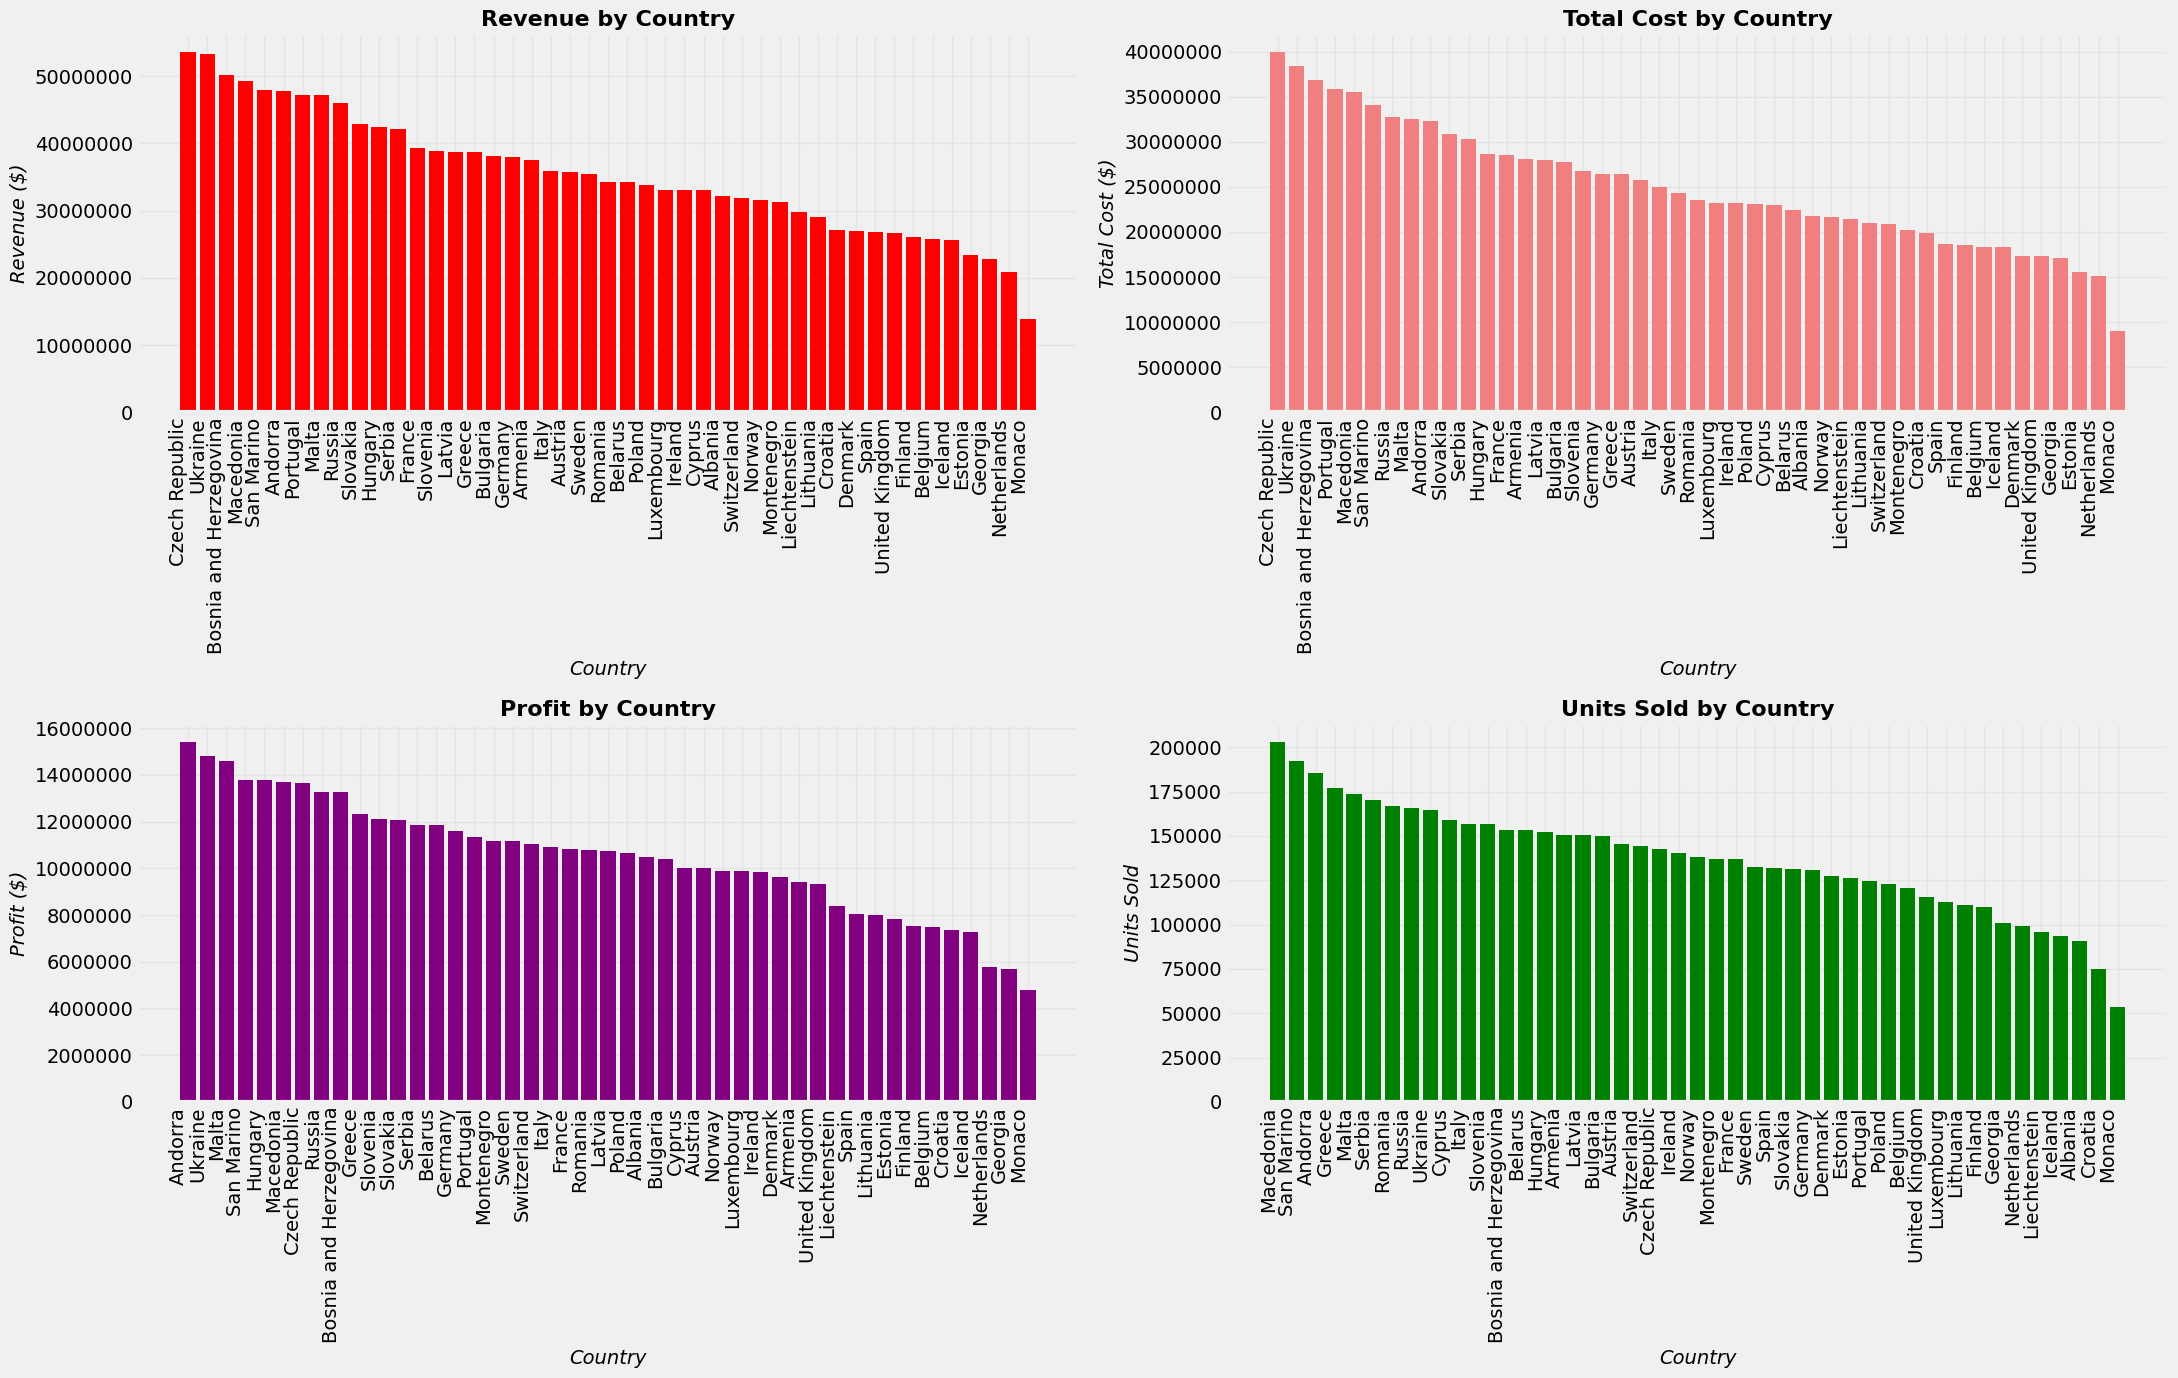

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(22, 14))

plots = [
    (axes[0, 0], revenue_by_country, "Revenue by Country", "Revenue ($)", "red"),
    (axes[0, 1], total_cost_by_country, "Total Cost by Country", "Total Cost ($)", "lightcoral"),
    (axes[1, 0], profit_by_country, "Profit by Country", "Profit ($)", "purple"),
    (axes[1, 1], units_sold_by_country, "Units Sold by Country", "Units Sold", "green"),
]

for ax, data, title, ylabel, color in plots:
    sorted_data = data.sort_values(ascending=False)
    sorted_countries = sorted_data.index
    sorted_values = sorted_data.values

    x_positions = range(len(sorted_countries))
    ax.bar(x_positions, sorted_values, color=color)
    ax.set_title(title, fontsize=16, fontweight="bold")
    ax.set_xlabel("Country", fontsize=14, fontstyle="italic")
    ax.set_ylabel(ylabel, fontsize=14, fontstyle="italic")
    ax.ticklabel_format(style='plain', axis='y')

    ax.set_xticks(x_positions)
    ax.set_xticklabels(sorted_countries, rotation=90, ha='right')

    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


##### Пропорція доходів, витрат, прибутку та кількості проданих товарів майже однакова через канали продажу: Offline та Online. І це майже 50/50. Але значення, які компанія отримує від продажу товарів через Offline, завжди трошки більші, ніж від Online.

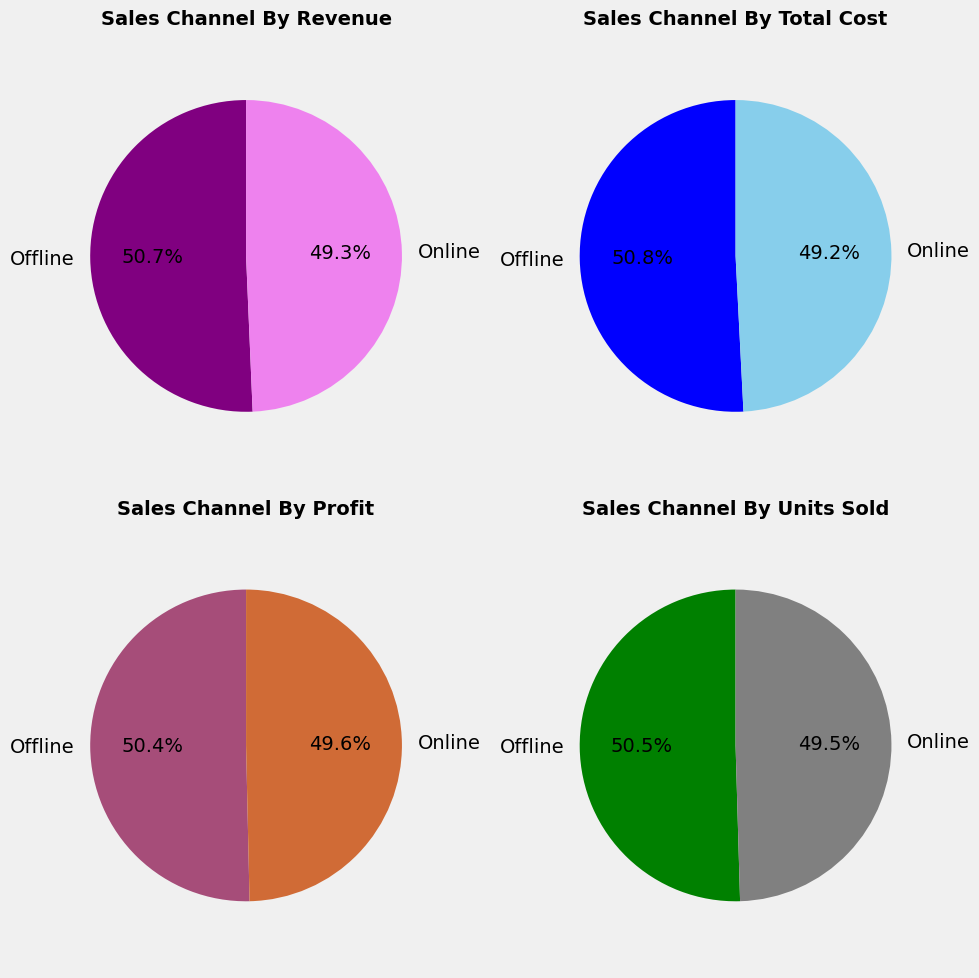

In [ ]:
colors = [
    ['purple', 'violet'],
    ['blue', 'skyblue'],
    ['#A64D79', '#D06B36'],
    ['green', 'grey'],
]

titles = [
    "Sales Channel By Revenue",
    "Sales Channel By Total Cost",
    "Sales Channel By Profit",
    "Sales Channel By Units Sold",
]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, (data, color, title) in enumerate(zip(
    [grouped_channels_by_revenue, grouped_channels_by_cost, grouped_channels_by_profit, grouped_channels_by_units_sold],
    colors,
    titles,
)):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=color)
    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.axis('equal')

plt.tight_layout()
plt.show()

#####Середній час між замовленням та відвантаженням (у днях) найдовший у категорії Office Supplies (27 днів), а найкоротший у категорії Personal Care (20 днів). Середній час між замовленням та відвантаженням у днях найдовший у Hungary (32 дня), а найкоротший у Croatia (18 днів). Середній час між замовленням та відвантаженням у днях: Asia - 26 днів, Europe - 24 дні.

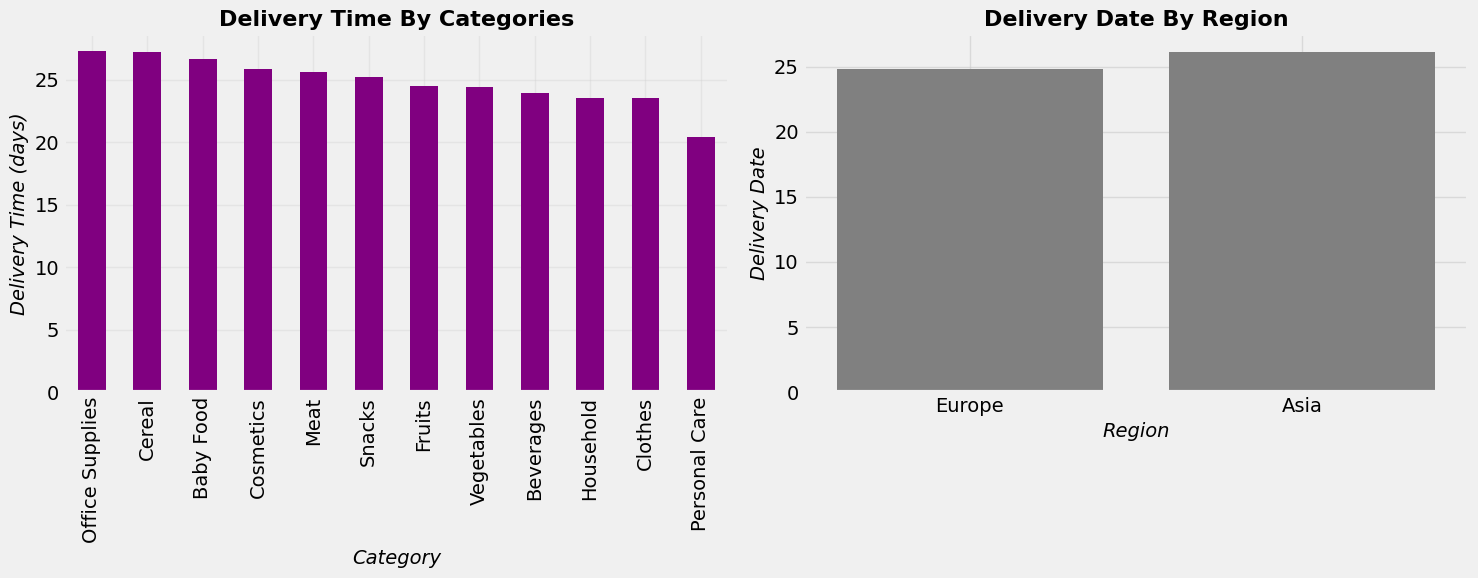

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

avg_delivery_time_by_category.plot(kind='bar', color='purple', ax=ax1)
ax1.set_title("Delivery Time By Categories", fontsize=16, fontweight="bold")
ax1.set_xlabel("Category", fontsize=14, fontstyle="italic")
ax1.set_ylabel("Delivery Time (days)", fontsize=14, fontstyle="italic")
ax1.ticklabel_format(style='plain', axis='y')
ax1.grid(True, alpha=0.3)

sns.barplot(x="region", y="delivery_time", errorbar=("ci", False), color='grey', data=final_df, ax=ax2)
ax2.set_title("Delivery Date By Region", fontsize=16, fontweight="bold")
ax2.set_xlabel("Region", fontsize=14, fontstyle="italic")
ax2.set_ylabel("Delivery Date", fontsize=14, fontstyle="italic")
ax2.grid(True, alpha=0.6)

plt.tight_layout()
plt.show()

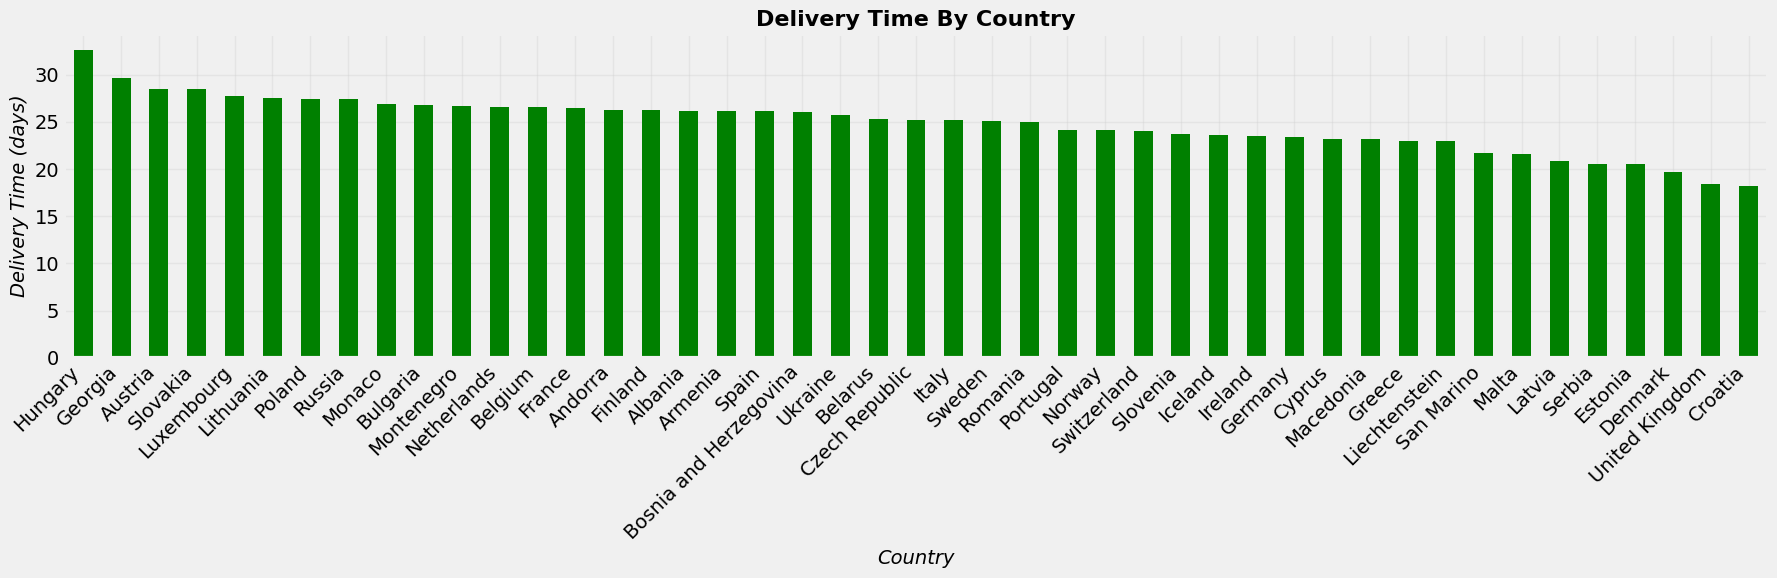

In [ ]:
plt.figure(figsize=(18, 6))
avg_delivery_time_by_country.plot(kind='bar', color='green')
plt.title("Delivery Time By Country", fontsize=16, fontweight="bold")
plt.xlabel("Country", fontsize=14, fontstyle="italic")
plt.ylabel("Delivery Time (days)", fontsize=14, fontstyle="italic")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#####Немає чіткої залежності між прибутком та часом, який потрібен на відвантаження. Час доставки не є основним фактором, від якого залежить прибуток компанії. Немає чіткого тренда на спадання чи зростання прибутку від часу доставки.

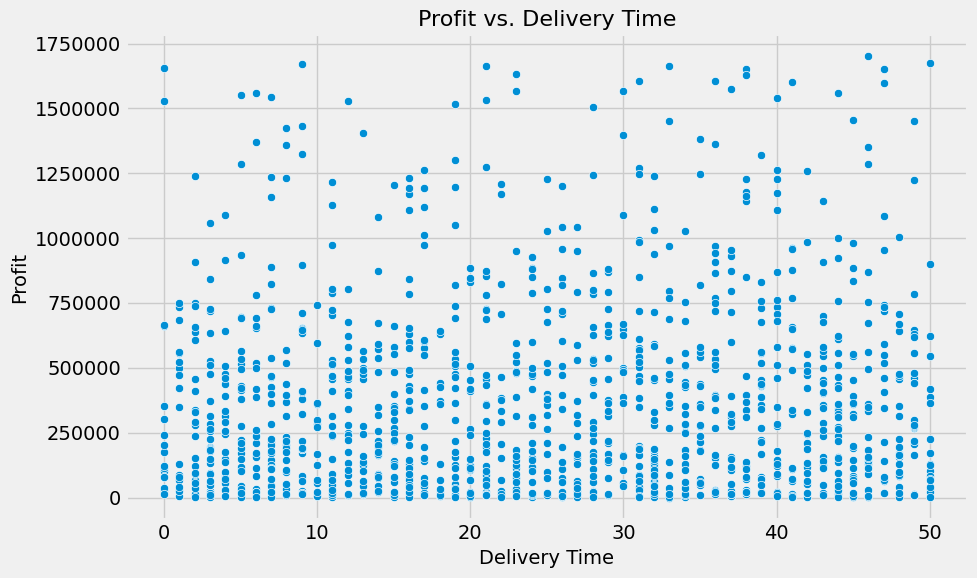

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='delivery_time', y='profit', data=final_df)
plt.xlabel('Delivery Time', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.title('Profit vs. Delivery Time', fontsize=16)
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.tight_layout()
plt.show()

#####Аналізуючи  динаміку продажів (у часі) у розрізі категорій товарів, можна побачити, що чіткої тенденції немає. Є постійні коливання, чіткого зростання або спадання прибутку по категоріям не виявлено.
Деякі категорії (Cosmetics, Household, Food) мають більші викіди - зростання прибутку в певні періоди часу. Аналізуючи динаміку продажів (у часі) у розрізі країн (Top 10), можна побачити, що між країнами є значна різниця у розмірі прибутку. Наприклад, у Czech Republic значно збільшився прибуток у 2014 році. Чіткої сезонності немає. Аналізуючи динаміку продажів (у часі) у розрізі регіонів, можна побачити, що прибуток по Європі значно більший, ніж по Азії у загальному. Але Азія більш стабільна, у Європі спостерігаються значні коливання. Спостерігається певна синхронність у змінах прибутку в обох регіонах, що може свідчити про вплив глобальних факторів.
Характерною рисою для всіх трьох графіків є значна волатильність прибутку, як за категоріями, так і за країнами та регіонами. Це свідчить про динамічне та мінливе ринкове середовище.

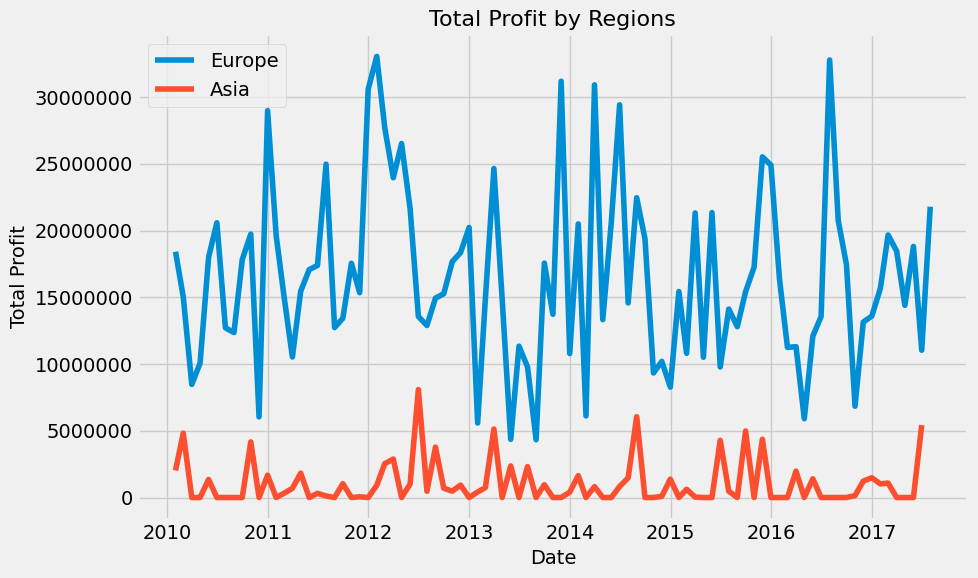

In [ ]:
plt.figure(figsize=(10, 6))
for region in final_df['region'].unique():
    region_sales = final_df[final_df['region'] == region].resample('ME')['revenue'].sum()
    plt.plot(region_sales.index, region_sales.values, label=region)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.title('Total Profit by Regions', fontsize=16)
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()

#####Аналізуючи продажі товарів за днями тижня можна побачити, що загалом продажі цілком стабільні протягом тижня, немає чітких спадів або зростань. Продажі більші у Saturday та Sunday, але не критично більші. Якщо оцінювати продажі товарів різних категорій по доходу за дні тижня, то можна побачити, що в загальному дохід по окремим категоріям є стабільним. Є незначні коливання, більш помітні у категоріях Household та Office Supplies, тому що у цих категоріях дохід вищий. На основі графіка можна стверджувати, що категорії Clothes, Fruits та Vegetables - це сезонні товари, тому що показники (дохід) збільшуються у окремі місяці. Товари інших категорій не сильно залежать від сезонності, попит на них сильно не змінюється в залежності від місяця.

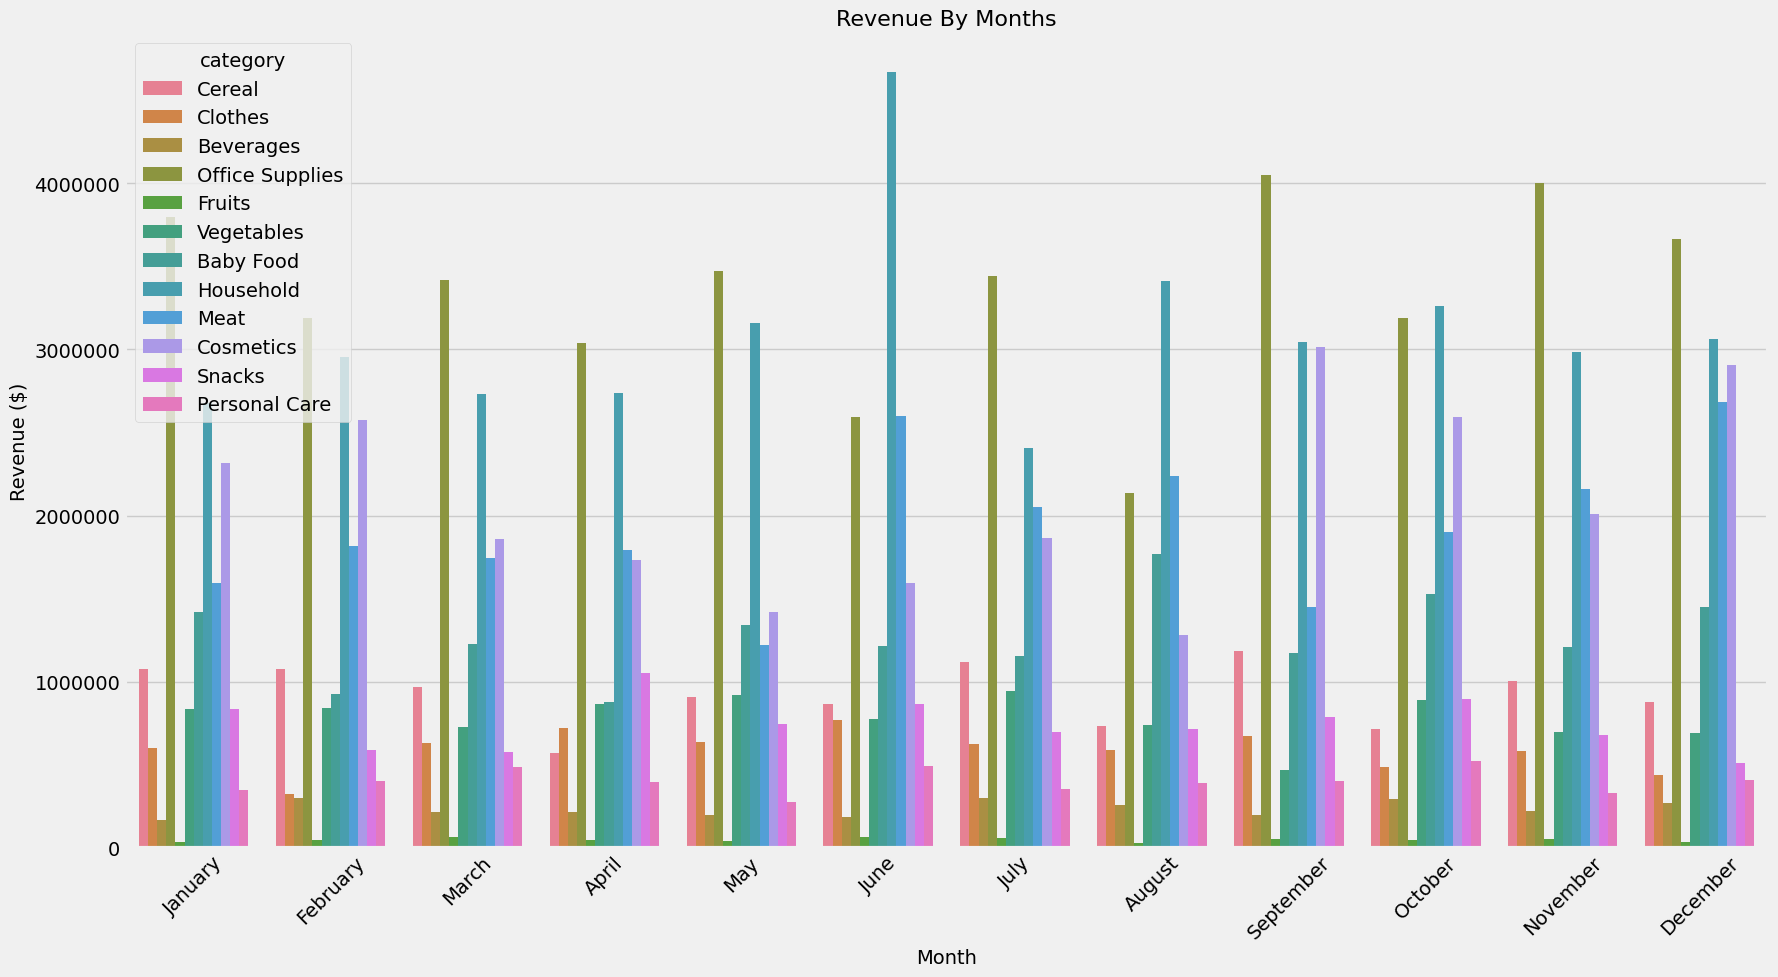

In [ ]:
plt.figure(figsize=(18, 10))
sns.barplot(data=final_df, x="month_name", y="revenue", hue="category", errorbar=("ci", False))
plt.title("Revenue By Months", fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Revenue ($)', fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

Загальну діяльність компанії можна оцінити, як стабільну.